<div align="center">
<h3>Street Crime Analysis In England Before and During COVID-19</h3>
</div>
<img src="files/crime.jpg", widht="500", height="100">
 

- We set to analyse street crime before and during in England with a major focus on London in comparison to other cities. We are already in the middle of a pandemic, 2nd year, and we wanted to look into crime as a factor to see how it has been affected during this period. Looking into crime would help us understand if there is any need for alarm in terms of security, whether we have to be dealing with a lot more than just the virus in terms of social and health wellbeing.
- Other than comparing London Street Crime to other major cities, we added other factors like Unemployment rate which was also affect during the pandemic period and Stringency to see how they related or influenced crime 2018-2021.

In [1]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
!pip install squarify
import squarify

#ensure all data is displayed
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/london_df.csv')
data.head()

Unnamed: 0    month                  reported by  longitude   latitude  \
0           0  2018-01  Metropolitan Police Service   0.140035  51.589112   
1           1  2018-01  Metropolitan Police Service   0.140035  51.589112   
2           2  2018-01  Metropolitan Police Service   0.135554  51.584985   
3           3  2018-01  Metropolitan Police Service   0.140035  51.589112   
4           4  2018-01  Metropolitan Police Service   0.135554  51.584985   

                     location  lsoa code                  lsoa name  \
0  On or near Beansland Grove    1000027  Barking and Dagenham 001A   
1  On or near Beansland Grove    1000027  Barking and Dagenham 001A   
2        On or near Rose Lane    1000027  Barking and Dagenham 001A   
3  On or near Beansland Grove    1000027  Barking and Dagenham 001A   
4        On or near Rose Lane    1000027  Barking and Dagenham 001A   

                  crime type                          last outcome category  \
0                   Burglary                        Offender sent to prison   
1                   Burglary  Investigation complete; no suspect identified   
2                   Burglary                      Status update unavailable   
3                   Burglary                      Status update unavailable   
4  Criminal damage and arson  Investigation complete; no suspect identified   

         borough_london  stringency  covid  
0  Barking and Dagenham         0.0      0  
1  Barking and Dagenham         0.0      0  
2  Barking and Dagenham         0.0      0  
3  Barking and Dagenham         0.0      0  
4  Barking and Dagenham         0.0      0

In [3]:
data.columns

Index(['Unnamed: 0', 'month', 'reported by', 'longitude', 'latitude',
       'location', 'lsoa code', 'lsoa name', 'crime type',
       'last outcome category', 'borough_london', 'stringency', 'covid'],
      dtype='object')

In [4]:
#drop unnecessary column
data.drop('Unnamed: 0', inplace=True, axis=1) 

In [5]:
data.shape

(2844241, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844241 entries, 0 to 2844240
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   month                  object 
 1   reported by            object 
 2   longitude              float64
 3   latitude               float64
 4   location               object 
 5   lsoa code              int64  
 6   lsoa name              object 
 7   crime type             object 
 8   last outcome category  object 
 9   borough_london         object 
 10  stringency             float64
 11  covid                  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 260.4+ MB


In [7]:
#numerical data summary
data.describe()

longitude      latitude     lsoa code    stringency         covid
count  2.844241e+06  2.844241e+06  2.844241e+06  2.844241e+06  2.844241e+06
mean  -1.179504e-01  5.151097e+01  1.004724e+06  2.514905e+01  3.889168e-01
std    1.425669e-01  6.619617e-02  8.076620e+03  3.282504e+01  4.875045e-01
min   -4.976980e-01  5.129442e+01  1.000001e+06  0.000000e+00  0.000000e+00
25%   -1.989330e-01  5.147102e+01  1.001410e+06  0.000000e+00  0.000000e+00
50%   -1.128980e-01  5.151533e+01  1.002714e+06  0.000000e+00  0.000000e+00
75%   -3.126500e-02  5.155411e+01  1.004027e+06  6.430310e+01  1.000000e+00
max    3.071510e-01  5.168717e+01  1.033746e+06  8.748037e+01  1.000000e+00

In [8]:
#check for null values in dataset
data.isna().sum()

month                    0
reported by              0
longitude                0
latitude                 0
location                 0
lsoa code                0
lsoa name                0
crime type               0
last outcome category    0
borough_london           0
stringency               0
covid                    0
dtype: int64

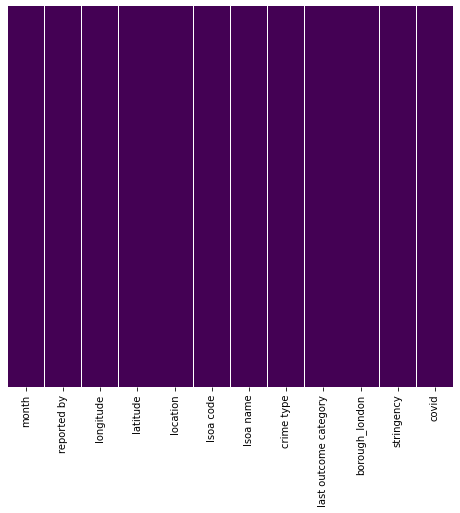

<Figure size 432x288 with 0 Axes>

In [10]:
#visualize the null values
plt.figure(figsize = (8,7))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()
plt.savefig('Missing Values')

### General EDA

This clearly shows that violence and sexual offences have had the highest record in all the four years we investigated 

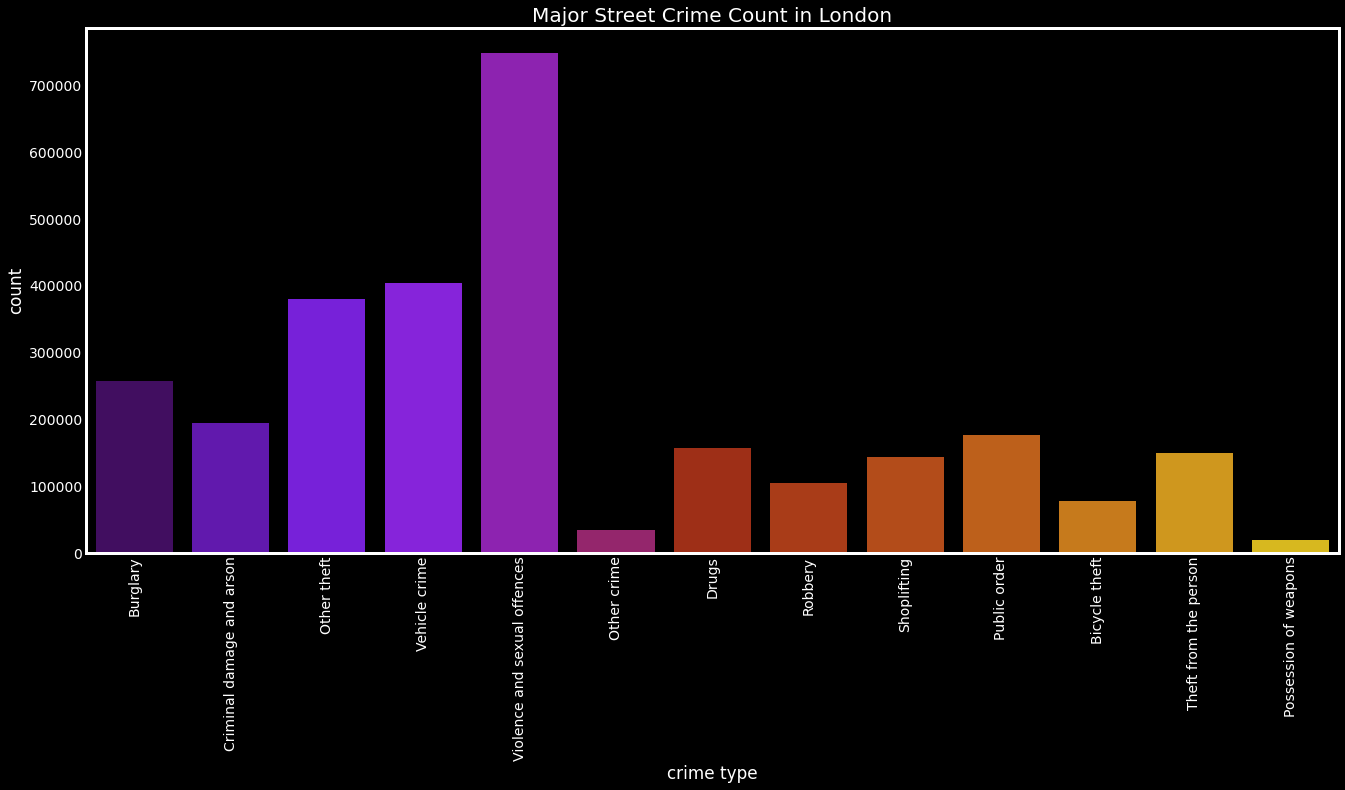

In [115]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['crime type'], palette = 'gnuplot')

plt.title('Major Street Crime Count in London', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

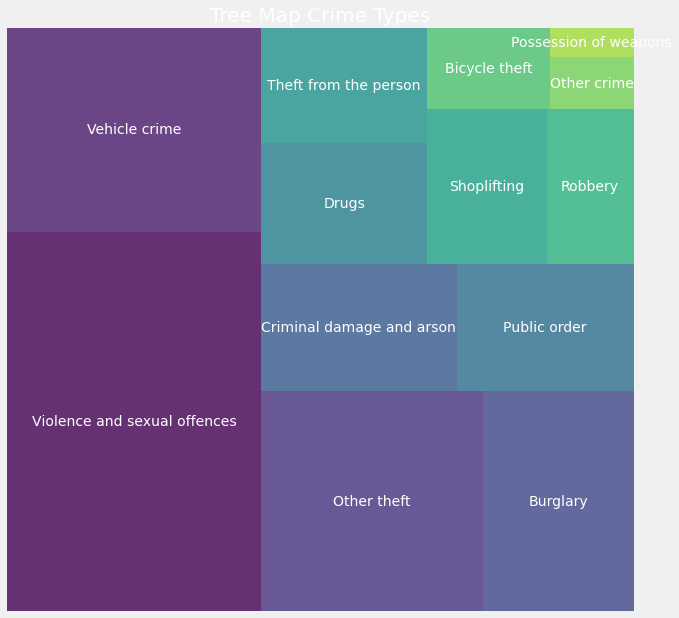

In [35]:
y = data['crime type'].value_counts()
    
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')

color = plt.cm.viridis(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map Crime Types', fontsize = 20)

plt.axis('off')
plt.show()

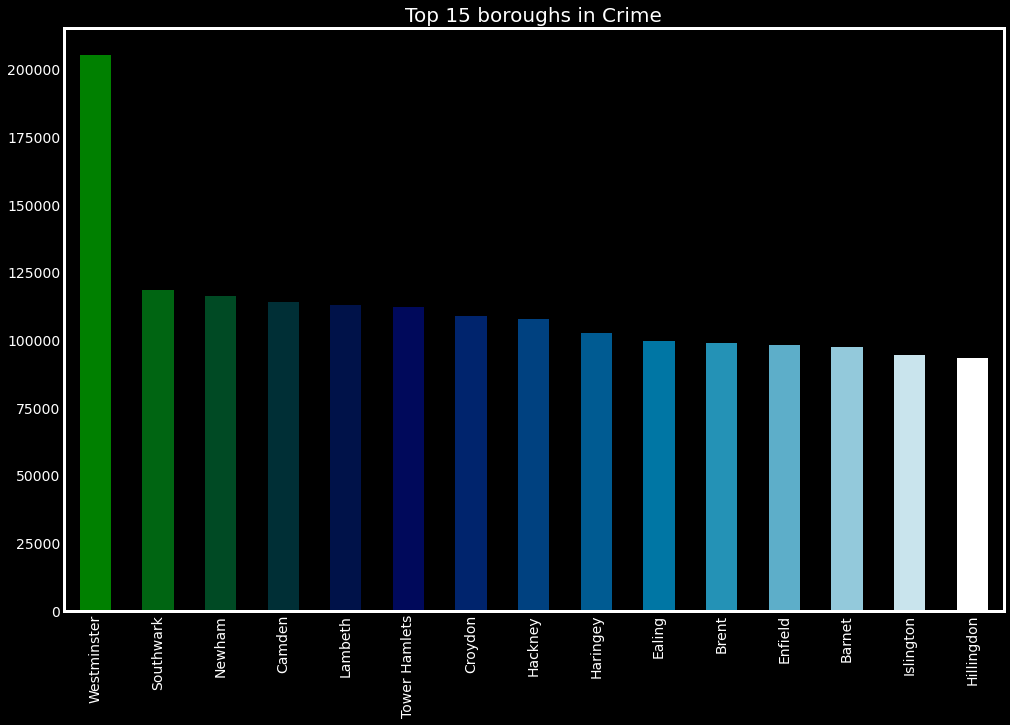

In [11]:
plt.rcParams['figure.figsize'] = (10, 5)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.ocean(np.linspace(0, 1, 15))
data['borough_london'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 boroughs in Crime',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(False)

plt.show()

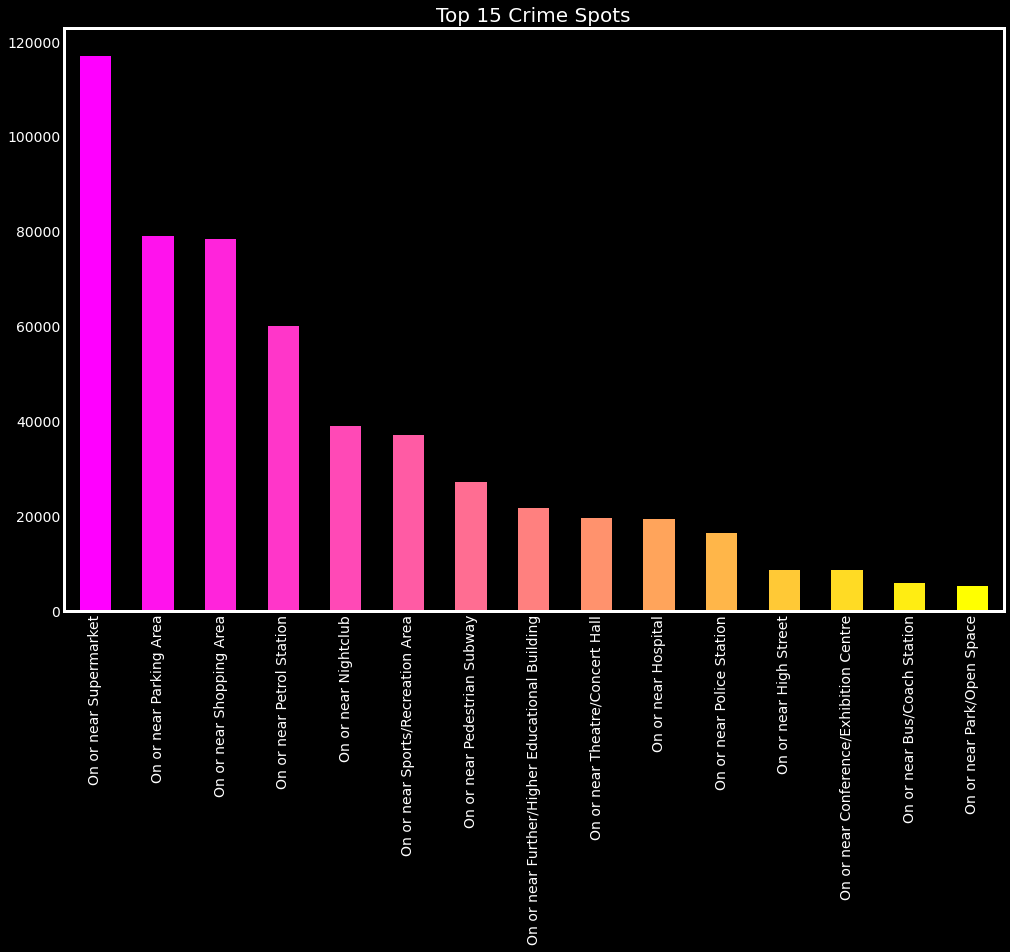

In [12]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.spring(np.linspace(0, 1, 15))
data['location'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 Crime Spots',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(b=None)
plt.show()

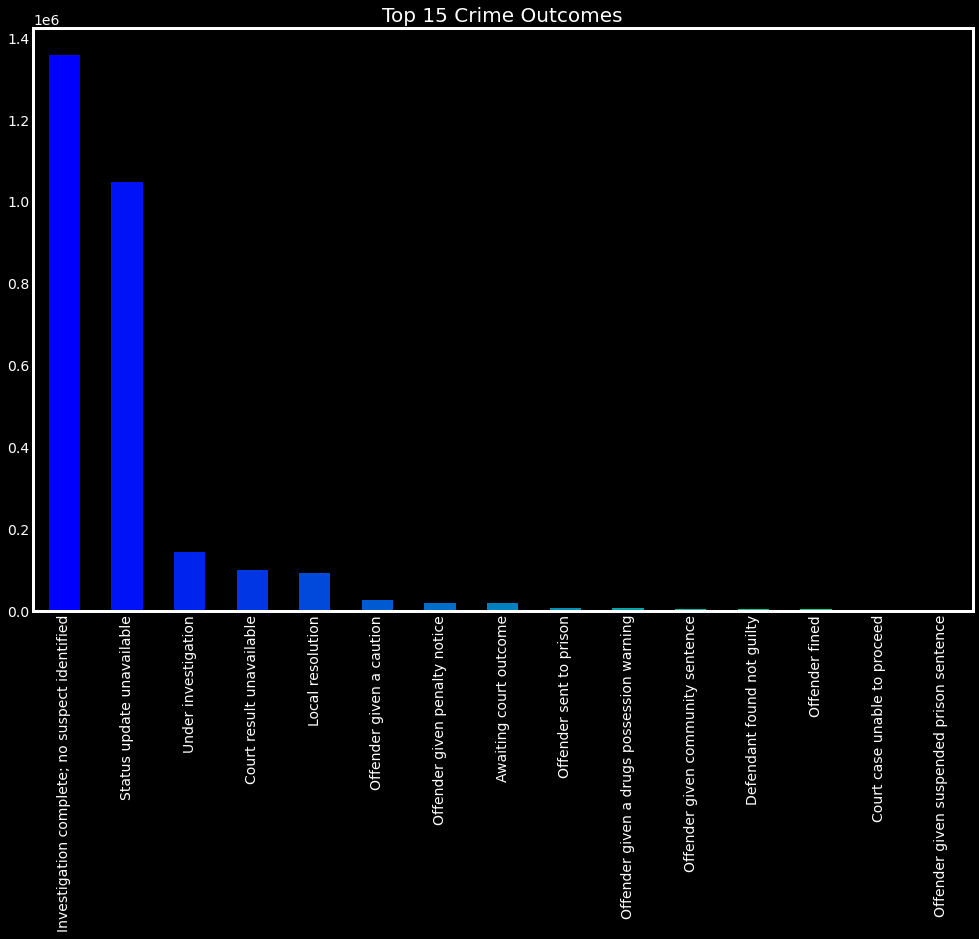

In [14]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.winter(np.linspace(0, 1, 15))
data['last outcome category'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 Crime Outcomes',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(b=None)
plt.show()

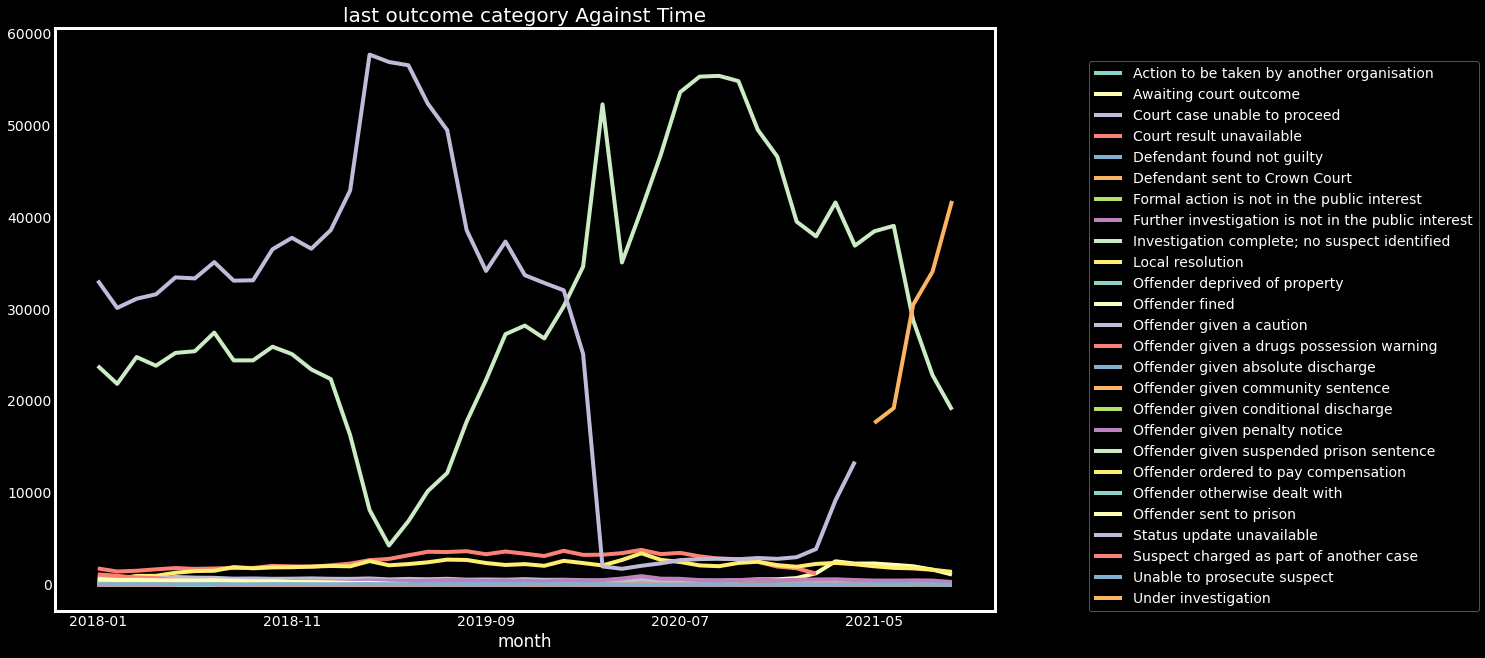

In [15]:
#plt.style.use('seaborn')
plt.style.use('dark_background')
m = data.groupby(['month', 'last outcome category']).size().unstack().plot.line(figsize=(15, 10))
plt.title('last outcome category Against Time',fontsize = 20)
plt.grid(b=None)
m.legend(loc=(1.1,0))

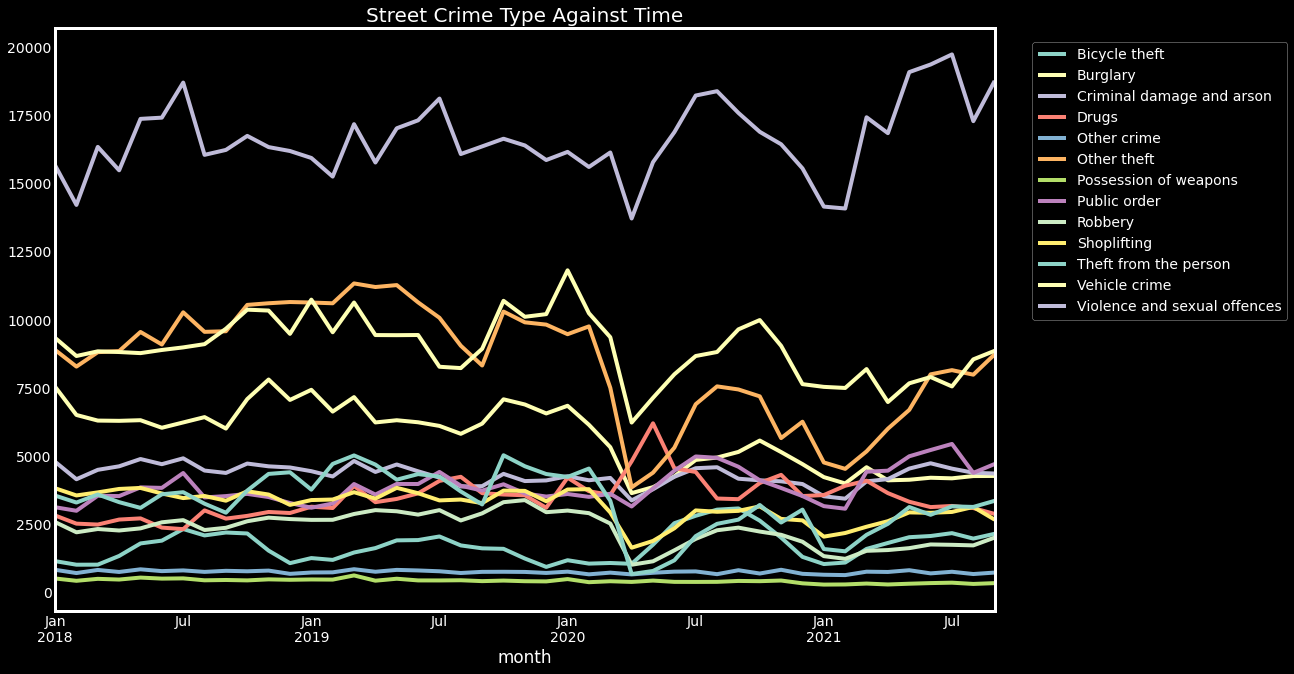

In [116]:
m = data.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)

plt.title('Street Crime Type Against Time',fontsize = 20)

m.legend(loc=(1.04,0.5))

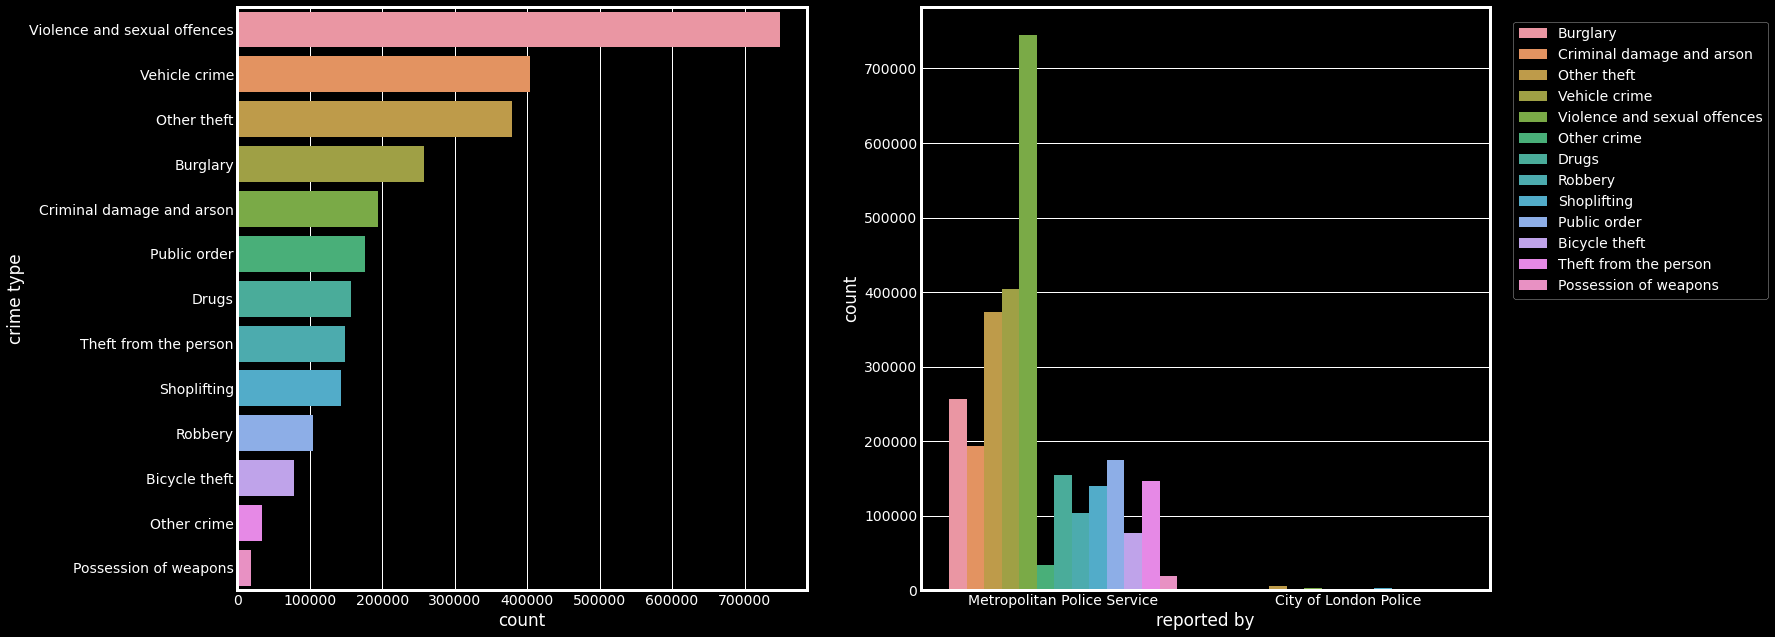

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
#sns.set(font_scale = 2)
sns.countplot(y='crime type', data=data, order=data['crime type'].value_counts().index, ax=axs[0])
m = sns.countplot(x='reported by', hue='crime type', data=data, order = data['reported by'].value_counts().index, ax=axs[1] )
m.legend(loc=(1.04,0.5))
#lt.grid(False)
plt.show()

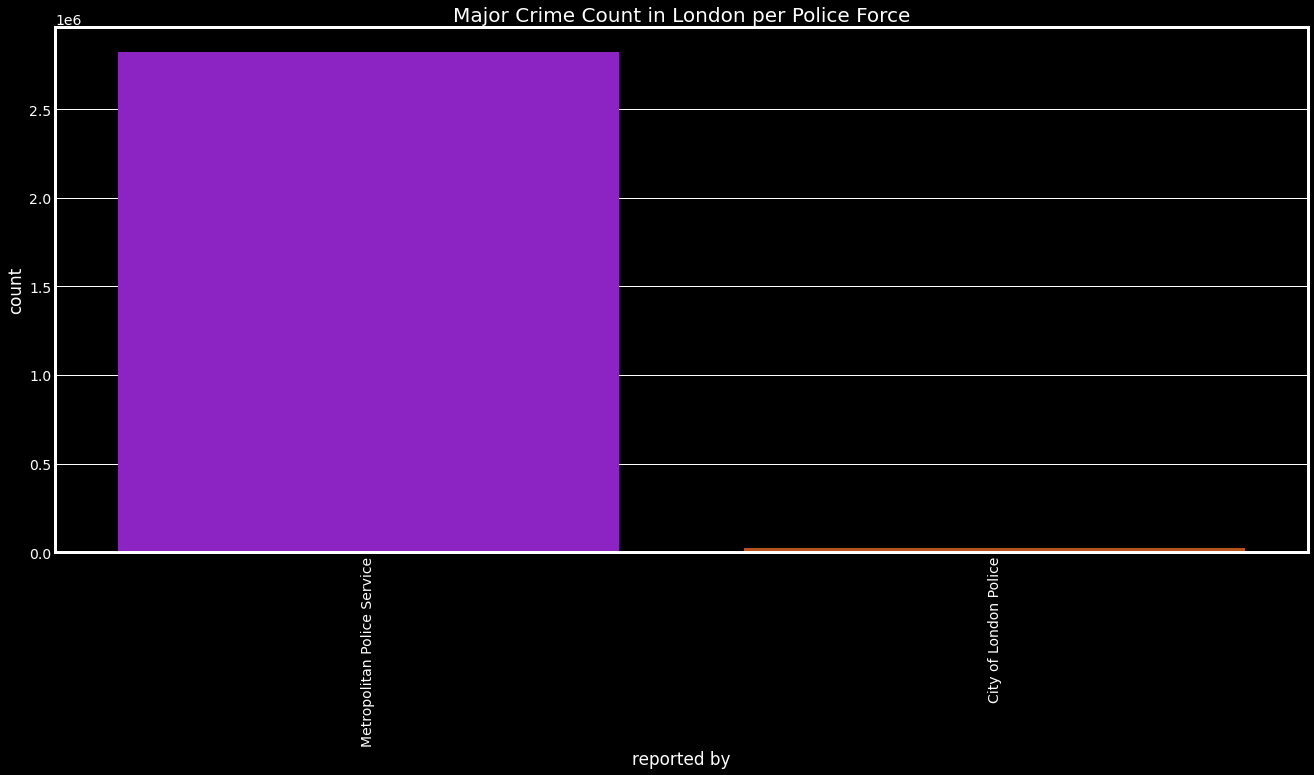

In [117]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['reported by'], palette = 'gnuplot')

plt.title('Major Crime Count in London per Police Force', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
#plt.grid(False)
plt.show()

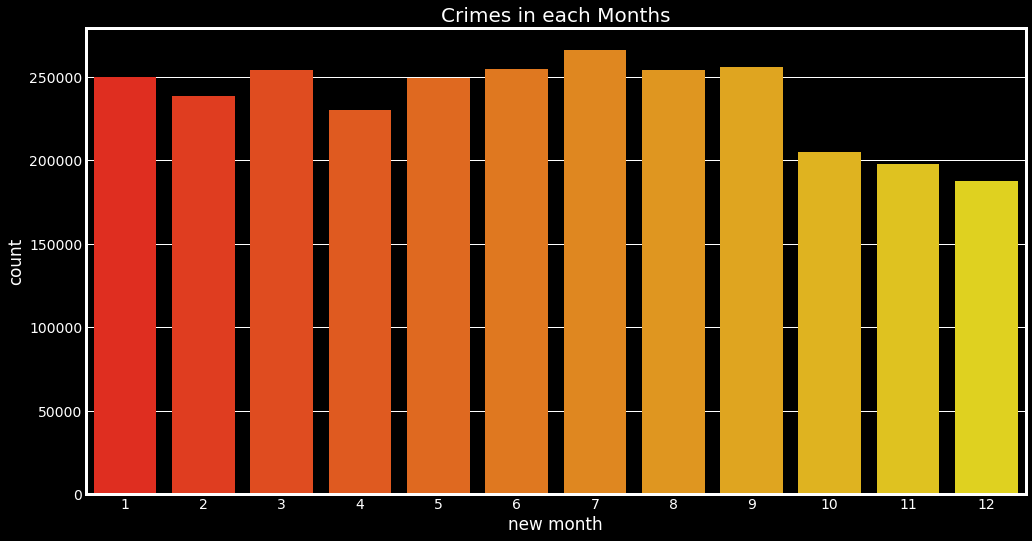

In [19]:
data['month'] = pd.to_datetime(data['month'])

data['new month'] = data['month'].dt.month

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['new month'], palette = 'autumn',)
plt.title('Crimes in each Months', fontsize = 20)

plt.show()

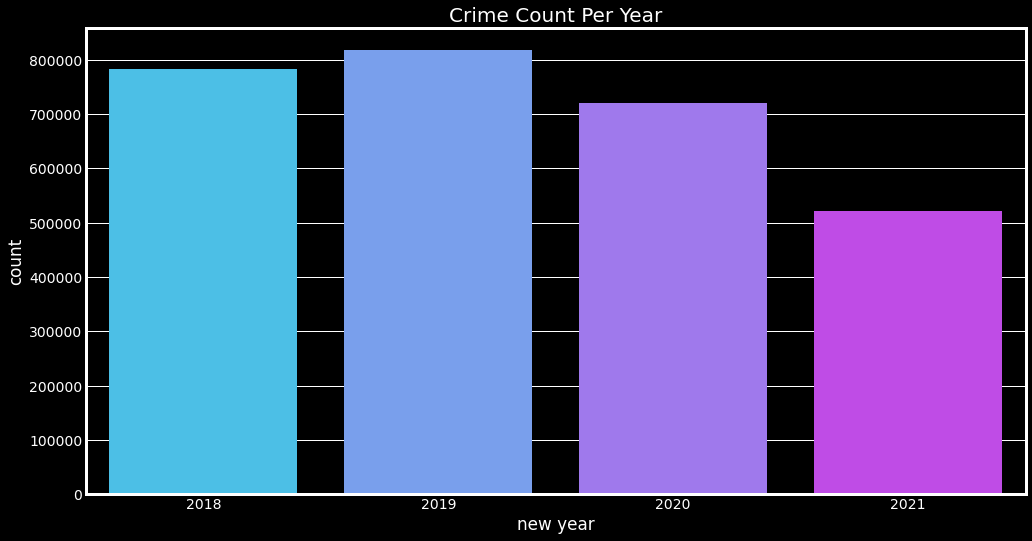

In [118]:
data['month'] = pd.to_datetime(data['month'])

data['new year'] = data['month'].dt.year

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['new year'], palette = 'cool',)
plt.title('Crime Count Per Year', fontsize = 20)

plt.show()

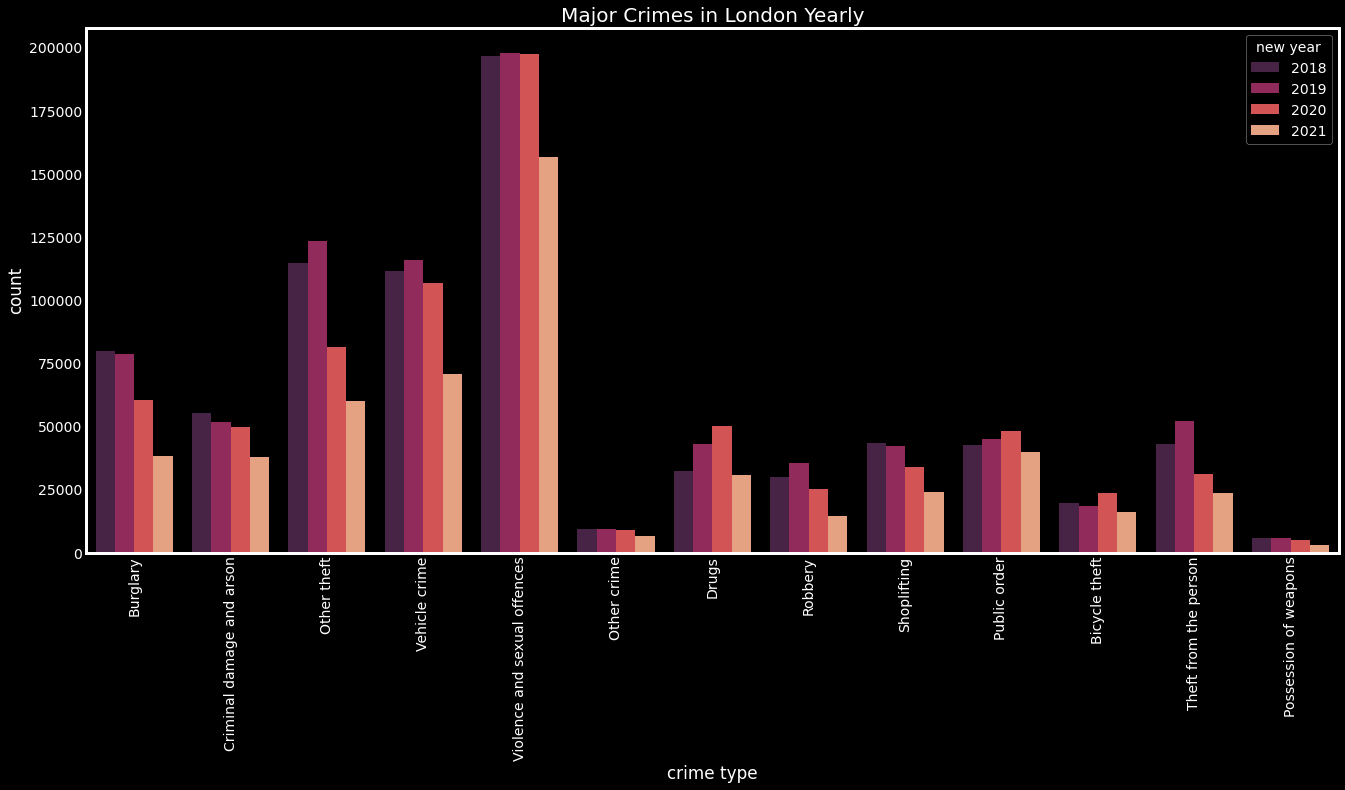

In [82]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['crime type'], hue=data['new year'], palette = 'rocket')

plt.title('Major Crimes in London Yearly', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

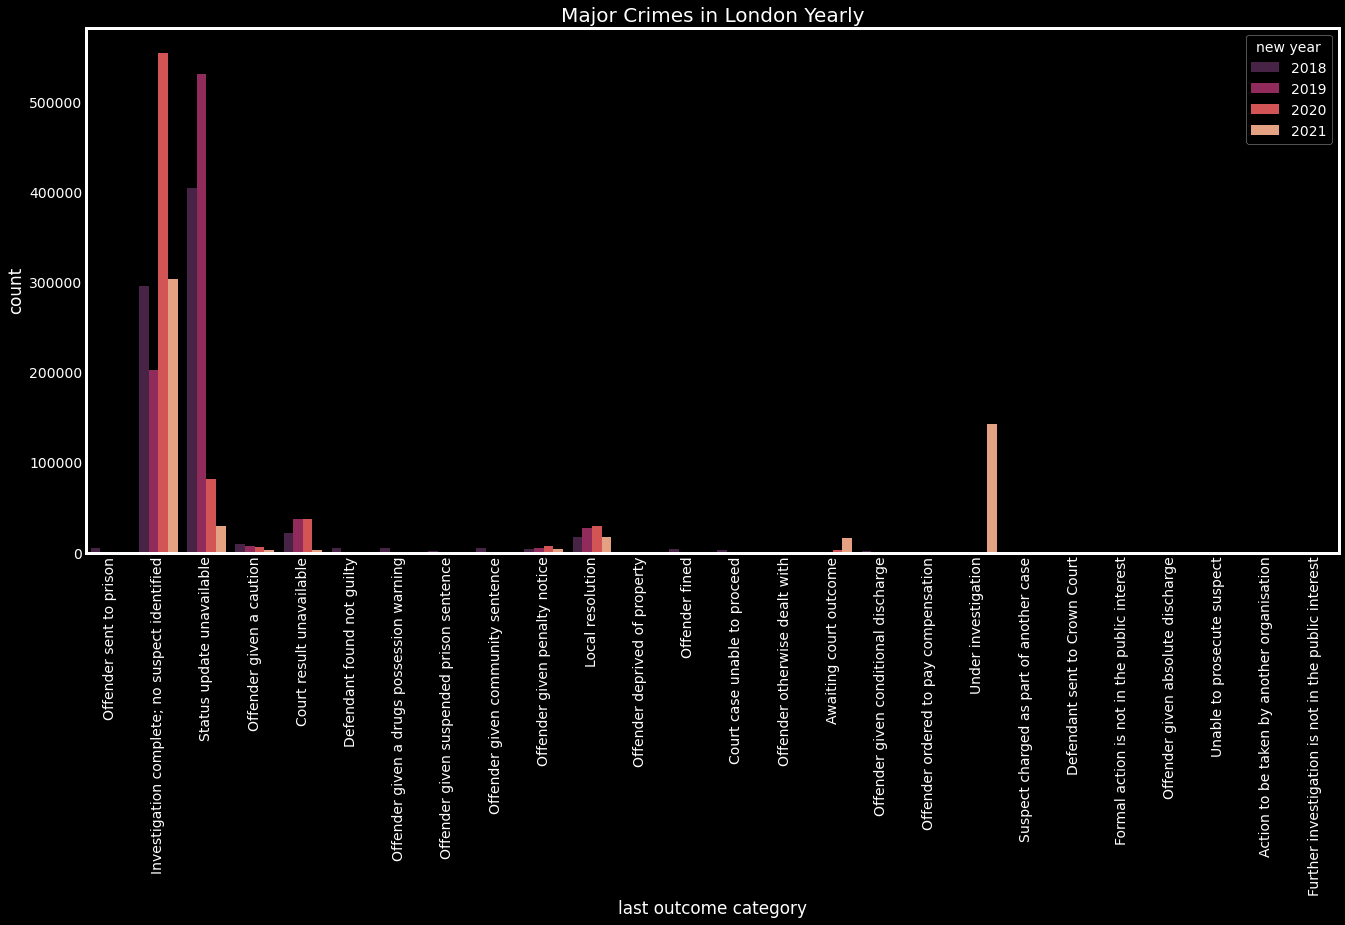

In [21]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['last outcome category'], hue=data['new year'], palette = 'rocket')

plt.title('Major Crimes in London Yearly', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

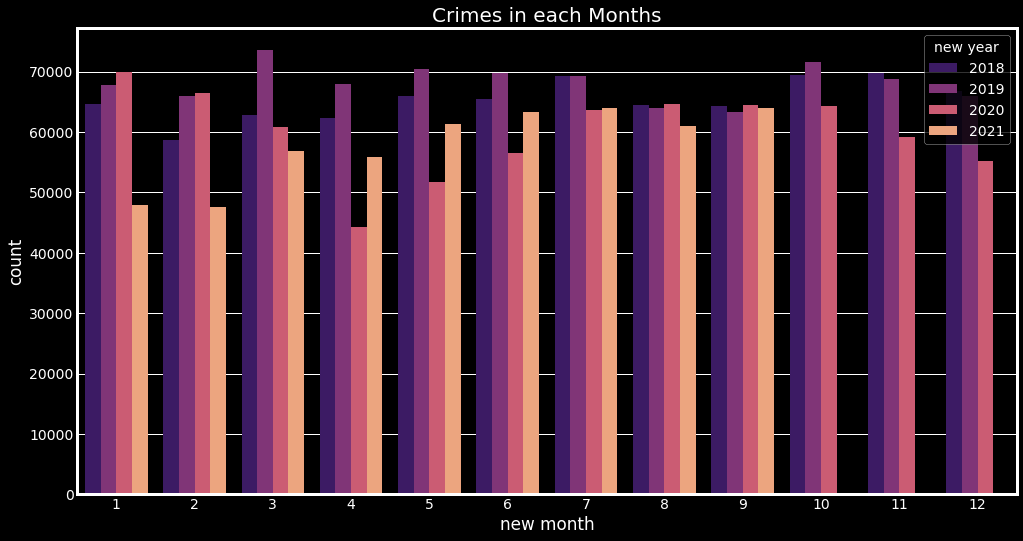

In [92]:
data['month'] = pd.to_datetime(data['month'])

data['new month'] = data['month'].dt.month

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['new month'], hue=data['new year'], palette = 'magma')
plt.title('Crimes in each Months', fontsize = 20)

plt.show()

In [22]:
data.tail()

month                  reported by  longitude   latitude  \
2844236 2021-09-01  Metropolitan Police Service  -0.135532  51.489097   
2844237 2021-09-01  Metropolitan Police Service  -0.134389  51.488872   
2844238 2021-09-01  Metropolitan Police Service  -0.133400  51.489117   
2844239 2021-09-01  Metropolitan Police Service  -0.134389  51.488872   
2844240 2021-09-01  Metropolitan Police Service  -0.135532  51.489097   

                              location  lsoa code         lsoa name  \
2844236  On or near St George'S Square    1004741  Westminster 024F   
2844237        On or near Lupus Street    1004741  Westminster 024F   
2844238  On or near Bessborough Street    1004741  Westminster 024F   
2844239        On or near Lupus Street    1004741  Westminster 024F   
2844240  On or near St George'S Square    1004741  Westminster 024F   

                           crime type  \
2844236         Theft from the person   
2844237         Theft from the person   
2844238  Violence and sexual offences   
2844239  Violence and sexual offences   
2844240  Violence and sexual offences   

                                 last outcome category borough_london  \
2844236  Investigation complete; no suspect identified    Westminster   
2844237                            Under investigation    Westminster   
2844238                            Under investigation    Westminster   
2844239                            Under investigation    Westminster   
2844240                            Under investigation    Westminster   

         stringency  covid  new month  new year  
2844236      42.034      1          9      2021  
2844237      42.034      1          9      2021  
2844238      42.034      1          9      2021  
2844239      42.034      1          9      2021  
2844240      42.034      1          9      2021

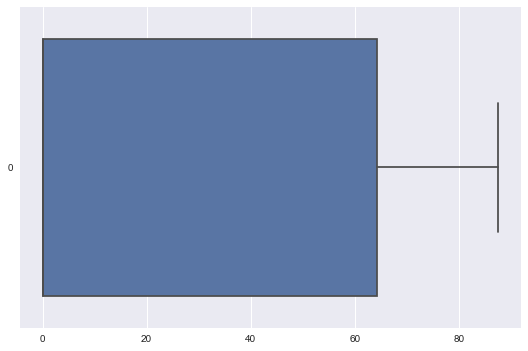

In [157]:
plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('seaborn')
sns.boxplot(data=data['stringency'], orient="h")
plt.show()

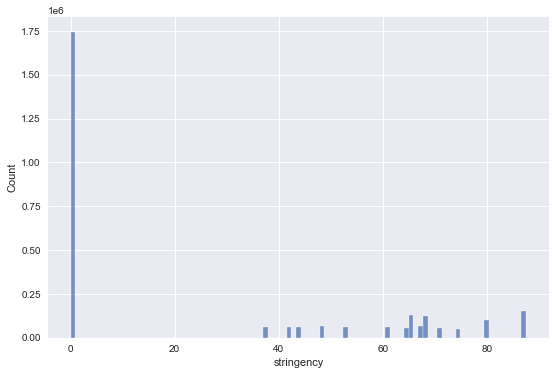

In [158]:
plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('seaborn')
sns.histplot(data=data['stringency'])
plt.show()

### Plotting Pre Pandemic Period

In [30]:
data_no_s = data[data['stringency'] == 0.0]
data_no_s.head()

month                  reported by  longitude   latitude  \
0 2018-01-01  Metropolitan Police Service   0.140035  51.589112   
1 2018-01-01  Metropolitan Police Service   0.140035  51.589112   
2 2018-01-01  Metropolitan Police Service   0.135554  51.584985   
3 2018-01-01  Metropolitan Police Service   0.140035  51.589112   
4 2018-01-01  Metropolitan Police Service   0.135554  51.584985   

                     location  lsoa code                  lsoa name  \
0  On or near Beansland Grove    1000027  Barking and Dagenham 001A   
1  On or near Beansland Grove    1000027  Barking and Dagenham 001A   
2        On or near Rose Lane    1000027  Barking and Dagenham 001A   
3  On or near Beansland Grove    1000027  Barking and Dagenham 001A   
4        On or near Rose Lane    1000027  Barking and Dagenham 001A   

                  crime type                          last outcome category  \
0                   Burglary                        Offender sent to prison   
1                   Burglary  Investigation complete; no suspect identified   
2                   Burglary                      Status update unavailable   
3                   Burglary                      Status update unavailable   
4  Criminal damage and arson  Investigation complete; no suspect identified   

         borough_london  stringency  covid  new month  new year  
0  Barking and Dagenham         0.0      0          1      2018  
1  Barking and Dagenham         0.0      0          1      2018  
2  Barking and Dagenham         0.0      0          1      2018  
3  Barking and Dagenham         0.0      0          1      2018  
4  Barking and Dagenham         0.0      0          1      2018

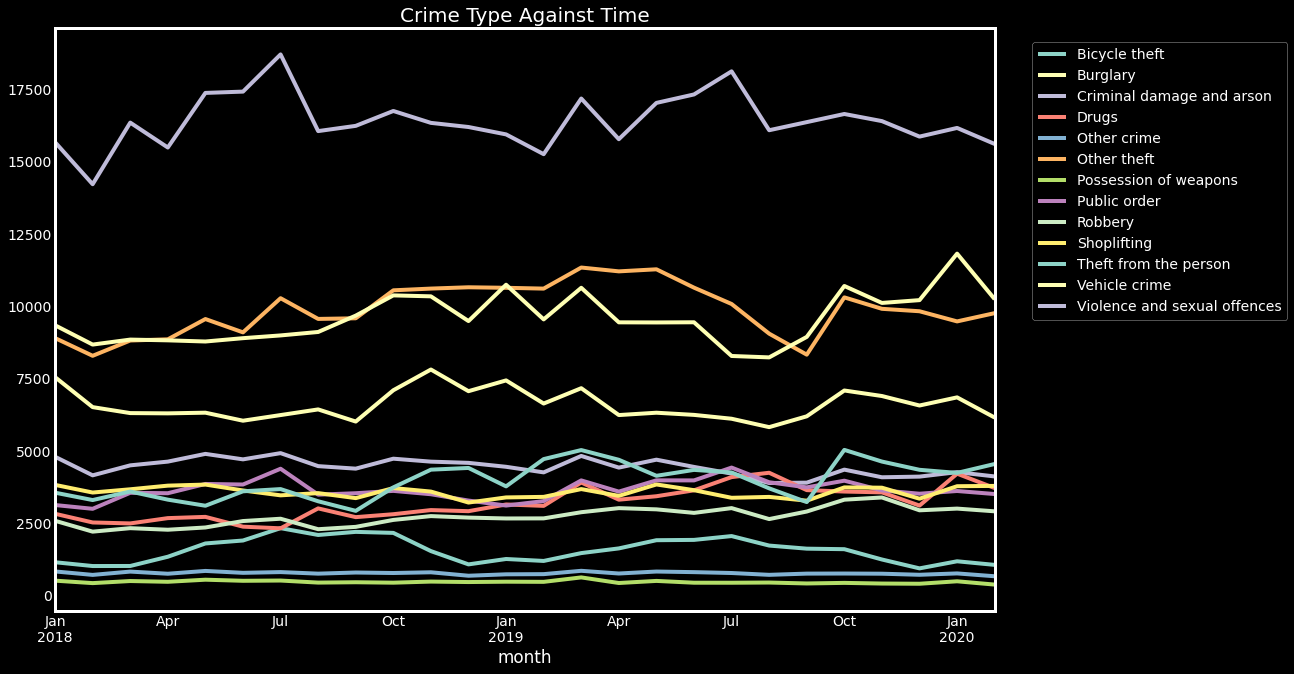

In [33]:
m = data_no_s.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)

plt.title('Crime Type Against Time',fontsize = 20)

m.legend(loc=(1.04,0.5))

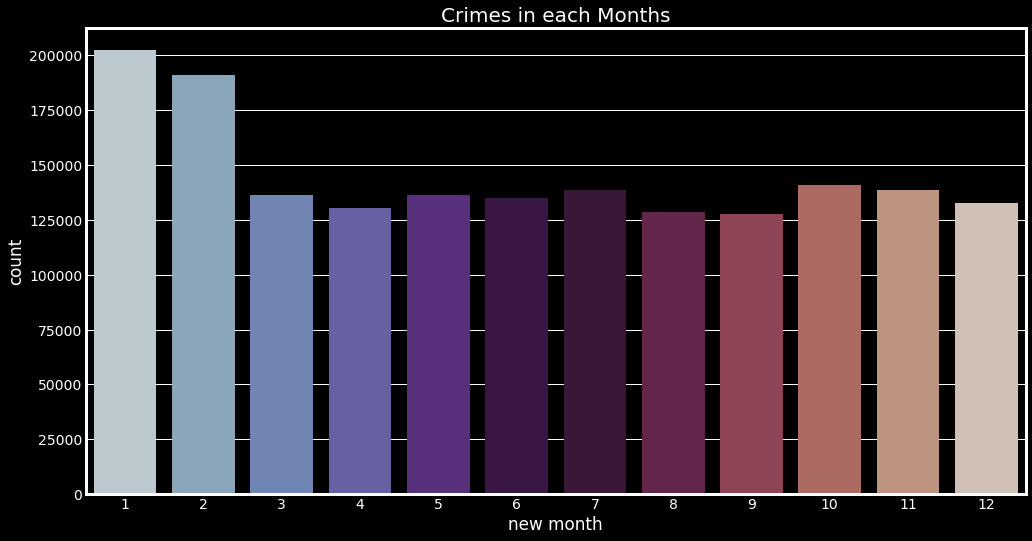

In [35]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data_no_s['new month'], palette = 'twilight',)
plt.title('Crimes in each Months', fontsize = 20)

plt.show()

### Plotting Pandemic Period Data

In [147]:
#data with stringency(pandemic period)
data_s = data[data['stringency'] > 0.0]
data_s.head()

month                  reported by  longitude   latitude  \
36963 2020-03-01  Metropolitan Police Service   0.140035  51.589112   
36964 2020-03-01  Metropolitan Police Service   0.138906  51.588737   
36965 2020-03-01  Metropolitan Police Service   0.138906  51.588737   
36966 2020-03-01  Metropolitan Police Service   0.135866  51.587336   
36967 2020-03-01  Metropolitan Police Service   0.145888  51.593835   

                              location  lsoa code                  lsoa name  \
36963       On or near Beansland Grove    1000027  Barking and Dagenham 001A   
36964  On or near Kingston Hill Avenue    1000027  Barking and Dagenham 001A   
36965  On or near Kingston Hill Avenue    1000027  Barking and Dagenham 001A   
36966       On or near Gibbfield Close    1000027  Barking and Dagenham 001A   
36967      On or near Providence Place    1000027  Barking and Dagenham 001A   

                      crime type  \
36963                   Burglary   
36964                   Burglary   
36965                   Burglary   
36966  Criminal damage and arson   
36967  Criminal damage and arson   

                               last outcome category        borough_london  \
36963  Investigation complete; no suspect identified  Barking and Dagenham   
36964  Investigation complete; no suspect identified  Barking and Dagenham   
36965  Investigation complete; no suspect identified  Barking and Dagenham   
36966                       Court result unavailable  Barking and Dagenham   
36967                       Court result unavailable  Barking and Dagenham   

       stringency  covid  new month  new year  
36963      37.484      1          3      2020  
36964      37.484      1          3      2020  
36965      37.484      1          3      2020  
36966      37.484      1          3      2020  
36967      37.484      1          3      2020

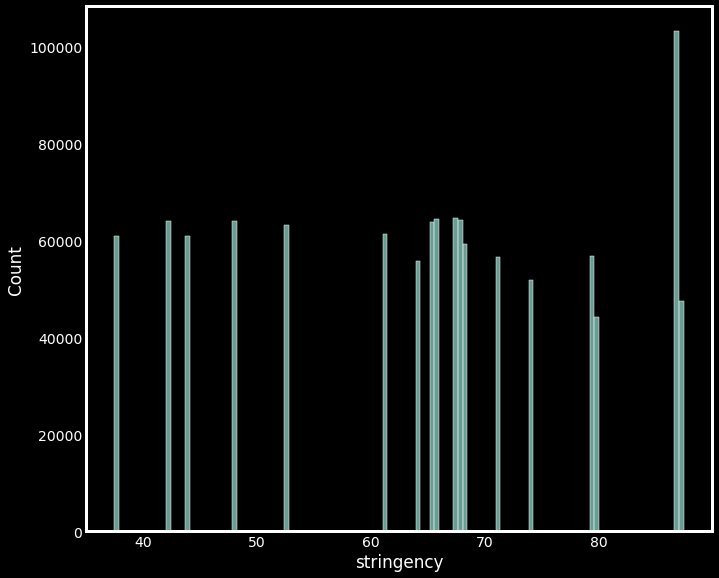

In [148]:
plt.rcParams['figure.figsize'] = (10, 9)
plt.grid(b=None)
sns.histplot(data=data_s['stringency'])
plt.show()

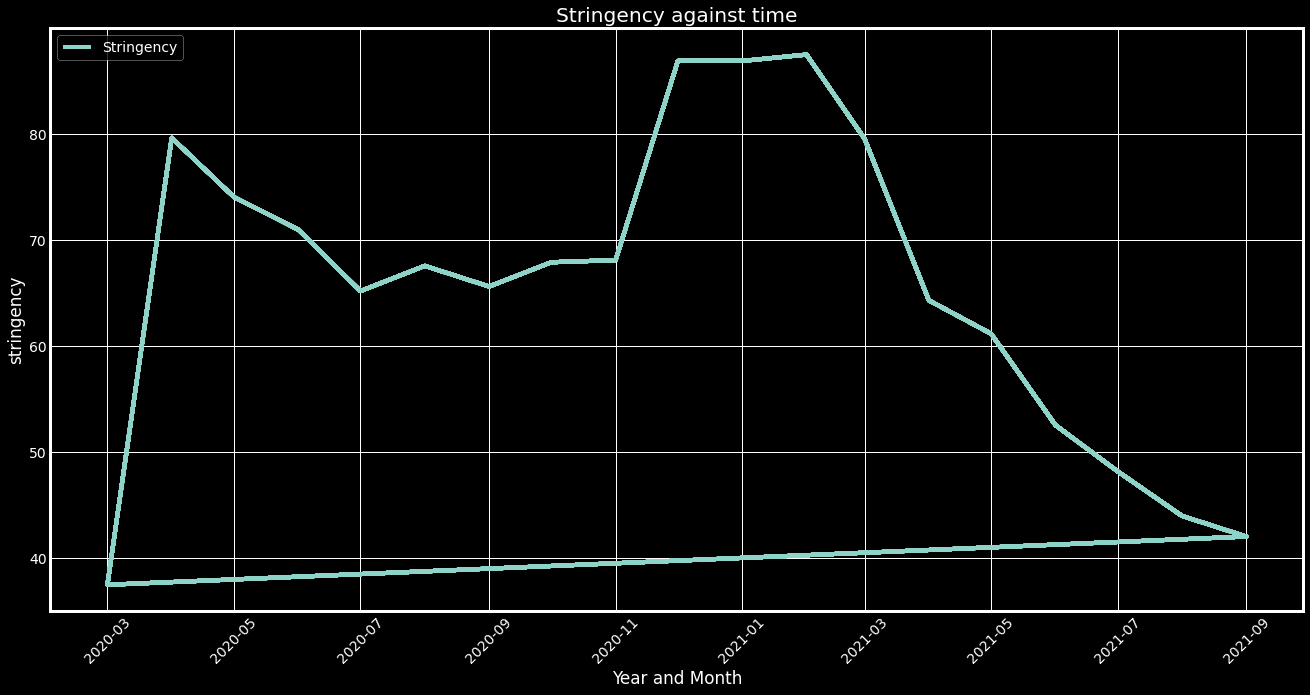

In [154]:
plt.figure(figsize=(20,10))

plt.plot(data_s['month'], data_s['stringency'], label = 'Stringency')

plt.xlabel('Year and Month')
plt.ylabel('stringency')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Stringency against time')

plt.show()

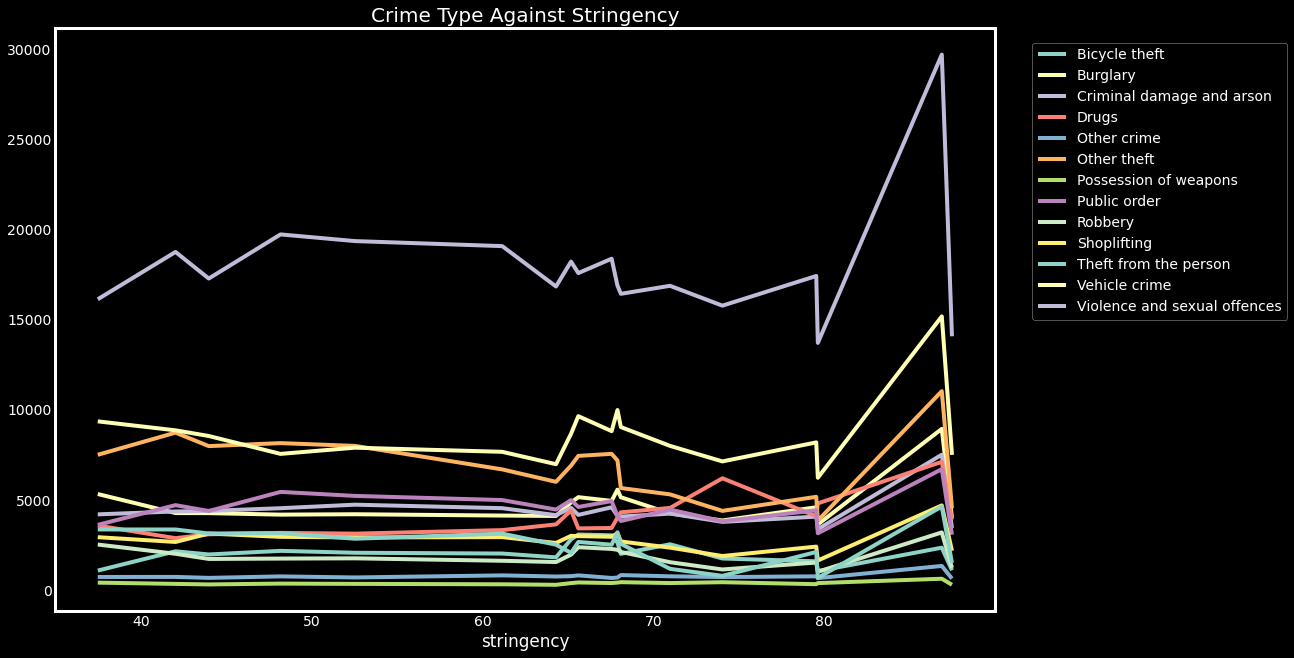

In [25]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

m = data_s.groupby(['stringency', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)
plt.title('Crime Type Against Stringency',fontsize = 20)
m.legend(loc=(1.04,0.5))

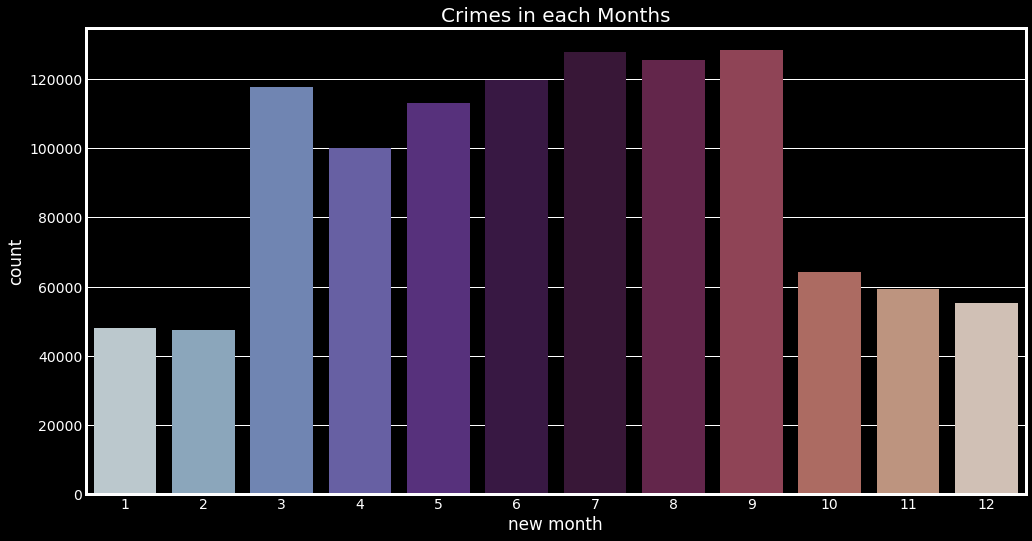

In [27]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data_s['new month'], palette = 'twilight',)
plt.title('Crimes in each Months', fontsize = 20)

plt.show()

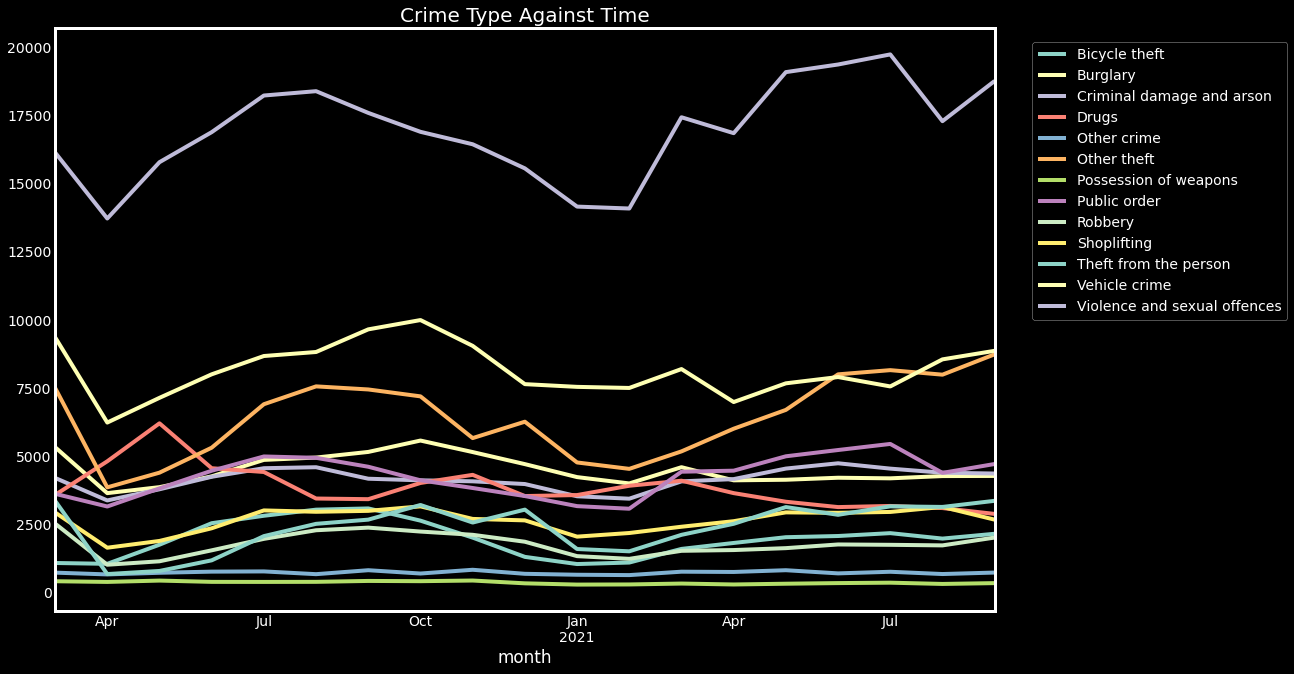

In [28]:
m = data_s.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)

plt.title('Crime Type Against Time',fontsize = 20)

m.legend(loc=(1.04,0.5))

In [29]:
#check different crime types reported
x = data_s['crime type'].value_counts()
y = data_s['crime type'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Violence and sexual offences    322274
Vehicle crime                   155330
Other theft                     122181
Burglary                         85550
Public order                     81031
Criminal damage and arson        78931
Drugs                            73200
Shoplifting                      50226
Theft from the person            45522
Bicycle theft                    37343
Robbery                          33674
Other crime                      13922
Possession of weapons             6989
Name: crime type, dtype: int64


There are are 13 categories 


### Adding Unemployment factor

In [102]:
new_df = data.groupby(['month', 'crime type']).size().unstack() #data.groupby("month")['crime type'].value_counts().unstack(fill_value=0)
new_df

crime type  Bicycle theft  Burglary  Criminal damage and arson  Drugs  \
month                                                                   
2018-01-01           1154      7548                       4797   2828   
2018-02-01           1023      6512                       4156   2528   
2018-03-01           1025      6306                       4501   2495   
2018-04-01           1344      6297                       4630   2678   
2018-05-01           1803      6320                       4897   2721   
2018-06-01           1905      6043                       4708   2383   
2018-07-01           2331      6238                       4923   2326   
2018-08-01           2096      6433                       4474   3014   
2018-09-01           2203      6014                       4387   2712   
2018-10-01           2168      7095                       4731   2813   
2018-11-01           1539      7811                       4629   2956   
2018-12-01           1080      7063                       4587   2918   
2019-01-01           1266      7435                       4451   3149   
2019-02-01           1199      6636                       4258   3101   
2019-03-01           1470      7166                       4826   3909   
2019-04-01           1632      6238                       4423   3315   
2019-05-01           1915      6319                       4697   3434   
2019-06-01           1926      6244                       4447   3638   
2019-07-01           2058      6111                       4216   4095   
2019-08-01           1730      5821                       3891   4245   
2019-09-01           1623      6195                       3903   3645   
2019-10-01           1605      7086                       4353   3596   
2019-11-01           1249      6896                       4089   3568   
2019-12-01            942      6568                       4112   3111   
2020-01-01           1187      6849                       4266   4213   
2020-02-01           1063      6152                       4118   3717   
2020-03-01           1086      5332                       4204   3580   
2020-04-01           1055      3647                       3379   4814   
2020-05-01           1756      3866                       3788   6206   
2020-06-01           2544      4261                       4246   4560   
2020-07-01           2817      4865                       4560   4422   
2020-08-01           3041      4951                       4596   3449   
2020-09-01           3086      5157                       4175   3425   
2020-10-01           2638      5574                       4116   4019   
2020-11-01           2016      5152                       4080   4317   
2020-12-01           1310      4710                       3980   3540   
2021-01-01           1047      4234                       3532   3576   
2021-02-01           1102      4002                       3443   3917   
2021-03-01           1602      4597                       4078   4102   
2021-04-01           1820      4116                       4161   3647   
2021-05-01           2031      4137                       4547   3331   
2021-06-01           2075      4211                       4741   3135   
2021-07-01           2180      4189                       4545   3177   
2021-08-01           1980      4272                       4395   3099   
2021-09-01           2157      4277                       4365   2884   

crime type  Other crime  Other theft  Possession of weapons  Public order  \
month                                                                       
2018-01-01          836         8897                    518          3130   
2018-02-01          717         8285                    433          3000   
2018-03-01          831         8814                    505          3553   
2018-04-01          757         8854                    479          3538   
2018-05-01          854         9555                    551          3858   
2018-06-01          788      

In [113]:
stringency = data[['month', 'stringency']].drop_duplicates()
#stringency

In [104]:
stringency['month'] = stringency['month'].dt.strftime('%Y-%m')

In [105]:
#stringency

In [106]:
new_sum_col = list(new_df.sum(axis=1))
new_df['total crimes per month'] = new_sum_col
#new_df

In [107]:
# saving the dataframe
new_df.to_csv('data/collapsed_data1.csv', index='month')

In [108]:
new_df2 = pd.read_csv('data/collapsed_data.csv')
#new_df2

In [109]:
new_df2['month'] = pd.to_datetime(new_df2.month)

In [110]:
stringency['month'] = pd.to_datetime(stringency.month)

In [111]:
new_df2 = pd.merge(new_df2, stringency, on="month", how="inner")
#new_df2

In [112]:
data1 = pd.read_csv('data/unemployment-london-region.csv')
#data1

In [135]:
data1['month'] = data1['month'].apply(lambda x: dt.datetime.strptime(x,'%b-%y') if type(x)==str else pd.NaT)

In [136]:
data1['month'] = data1['month'].dt.strftime('%Y-%m')

In [137]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            45 non-null     object 
 1   Numbers ('000s)  45 non-null     int64  
 2   Rates (%)        45 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [138]:
data1['month'] = pd.to_datetime(data1.month)

In [139]:
#Merge the unemployment df with crime df

df = pd.merge(new_df2, data1, on="month", how="inner")
df

month  Bicycle theft  Burglary  Criminal damage and arson  Drugs  \
0  2018-01-01           1155      7554                       4802   2832   
1  2018-02-01           1023      6518                       4157   2531   
2  2018-03-01           1025      6310                       4509   2500   
3  2018-04-01           1344      6300                       4633   2681   
4  2018-05-01           1803      6326                       4905   2730   
5  2018-06-01           1907      6048                       4711   2391   
6  2018-07-01           2333      6243                       4926   2331   
7  2018-08-01           2097      6438                       4486   3019   
8  2018-09-01           2204      6017                       4390   2716   
9  2018-10-01           2171      7101                       4735   2815   
10 2018-11-01           1540      7813                       4631   2960   
11 2018-12-01           1080      7070                       4589   2919   
12 2019-01-01           1266      7438                       4454   3154   
13 2019-02-01           1199      6641                       4262   3104   
14 2019-03-01           1470      7170                       4831   3916   
15 2019-04-01           1632      6247                       4429   3322   
16 2019-05-01           1915      6325                       4706   3444   
17 2019-06-01           1929      6249                       4456   3642   
18 2019-07-01           2059      6114                       4218   4103   
19 2019-08-01           1731      5826                       3901   4252   
20 2019-09-01           1623      6200                       3913   3648   
21 2019-10-01           1606      7089                       4360   3601   
22 2019-11-01           1250      6901                       4094   3575   
23 2019-12-01            944      6572                       4118   3119   
24 2020-01-01           1188      6862                       4275   4221   
25 2020-02-01           1063      6155                       4119   3726   
26 2020-03-01           1086      5333                       4211   3586   
27 2020-04-01           1055      3649                       3384   4819   
28 2020-05-01           1756      3866                       3790   6219   
29 2020-06-01           2545      4266                       4250   4566   
30 2020-07-01           2818      4867                       4568   4441   
31 2020-08-01           3041      4955                       4602   3456   
32 2020-09-01           3087      5161                       4184   3438   
33 2020-10-01           2638      5576                       4126   4028   
34 2020-11-01           2016      5154                       4084   4330   
35 2020-12-01           1310      4713                       3983   3556   
36 2021-01-01           1047      4242                       3536   3597   
37 2021-02-01           1102      4006                       3449   3937   
38 2021-03-01           1602      4598                       4082   4113   
39 2021-04-01           1820      4120                       4167   3659   
40 2021-05-01           2033      4144                       4557   3341   
41 2021-06-01           2076      4215                       4749   3145   
42 2021-07-01           2182      4195                       4556   3189   
43 2021-08-01           1982      4277                       4404   3113   
44 2021-09-01           2158      4283                       4375   2890   

    Other crime  Other theft  Possession of weapons  Public order  Robbery  \
0           840         8907                    518          3133     2587   
1           721         8302                    436          3005     2213   
2           836         8832                    510          3560     2331   
3           761         8871                    481          3543     2278   
4           858         9582                    552          3864     2359   
5           791         9112               

In [140]:
df.columns = map(str.lower, df.columns)

In [141]:
#Rename columns
df = df.rename(columns={"numbers ('000s)":"unemployment numbers(000s)",
            
                   "rates (%)":"unemployment rate(%)"
                   })
df

month  bicycle theft  burglary  criminal damage and arson  drugs  \
0  2018-01-01           1155      7554                       4802   2832   
1  2018-02-01           1023      6518                       4157   2531   
2  2018-03-01           1025      6310                       4509   2500   
3  2018-04-01           1344      6300                       4633   2681   
4  2018-05-01           1803      6326                       4905   2730   
5  2018-06-01           1907      6048                       4711   2391   
6  2018-07-01           2333      6243                       4926   2331   
7  2018-08-01           2097      6438                       4486   3019   
8  2018-09-01           2204      6017                       4390   2716   
9  2018-10-01           2171      7101                       4735   2815   
10 2018-11-01           1540      7813                       4631   2960   
11 2018-12-01           1080      7070                       4589   2919   
12 2019-01-01           1266      7438                       4454   3154   
13 2019-02-01           1199      6641                       4262   3104   
14 2019-03-01           1470      7170                       4831   3916   
15 2019-04-01           1632      6247                       4429   3322   
16 2019-05-01           1915      6325                       4706   3444   
17 2019-06-01           1929      6249                       4456   3642   
18 2019-07-01           2059      6114                       4218   4103   
19 2019-08-01           1731      5826                       3901   4252   
20 2019-09-01           1623      6200                       3913   3648   
21 2019-10-01           1606      7089                       4360   3601   
22 2019-11-01           1250      6901                       4094   3575   
23 2019-12-01            944      6572                       4118   3119   
24 2020-01-01           1188      6862                       4275   4221   
25 2020-02-01           1063      6155                       4119   3726   
26 2020-03-01           1086      5333                       4211   3586   
27 2020-04-01           1055      3649                       3384   4819   
28 2020-05-01           1756      3866                       3790   6219   
29 2020-06-01           2545      4266                       4250   4566   
30 2020-07-01           2818      4867                       4568   4441   
31 2020-08-01           3041      4955                       4602   3456   
32 2020-09-01           3087      5161                       4184   3438   
33 2020-10-01           2638      5576                       4126   4028   
34 2020-11-01           2016      5154                       4084   4330   
35 2020-12-01           1310      4713                       3983   3556   
36 2021-01-01           1047      4242                       3536   3597   
37 2021-02-01           1102      4006                       3449   3937   
38 2021-03-01           1602      4598                       4082   4113   
39 2021-04-01           1820      4120                       4167   3659   
40 2021-05-01           2033      4144                       4557   3341   
41 2021-06-01           2076      4215                       4749   3145   
42 2021-07-01           2182      4195                       4556   3189   
43 2021-08-01           1982      4277                       4404   3113   
44 2021-09-01           2158      4283                       4375   2890   

    other crime  other theft  possession of weapons  public order  robbery  \
0           840         8907                    518          3133     2587   
1           721         8302                    436          3005     2213   
2           836         8832                    510          3560     2331   
3           761         8871                    481          3543     2278   
4           858         9582                    552          3864     2359   
5           791         9112               

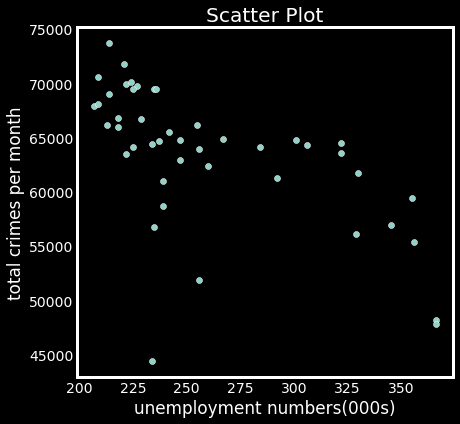

In [142]:
plt.figure(figsize=(6,6))
sns.scatterplot(df["unemployment numbers(000s)"], df['total crimes per month'])
plt.title('Scatter Plot')
plt.grid(False)
plt.show()

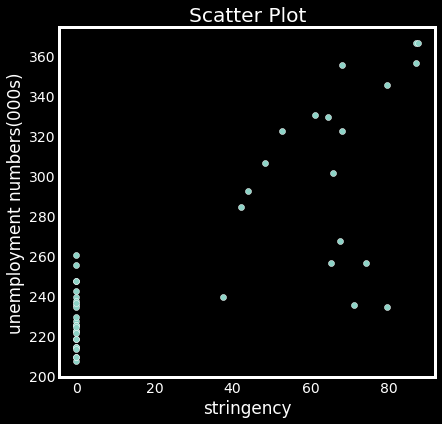

In [157]:
plt.figure(figsize=(6,6))
sns.scatterplot(df['stringency'],df["unemployment numbers(000s)"])
plt.title('Scatter Plot')
plt.grid(False)
plt.show()

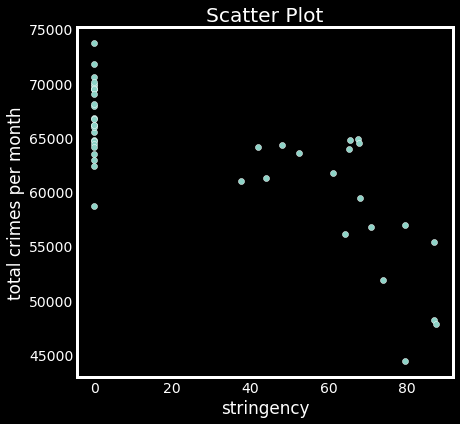

In [158]:
plt.figure(figsize=(6,6))
sns.scatterplot(df['stringency'],df["total crimes per month"])
plt.title('Scatter Plot')
plt.grid(False)
plt.show()

In [172]:
columns_num = df.describe().columns.tolist()  # numeric variables
columns_num

['bicycle theft',
 'burglary',
 'criminal damage and arson',
 'drugs',
 'other crime',
 'other theft',
 'possession of weapons',
 'public order',
 'robbery',
 'shoplifting',
 'theft from the person',
 'vehicle crime',
 'violence and sexual offences',
 'total crimes per month',
 'stringency',
 'unemployment numbers(000s)']

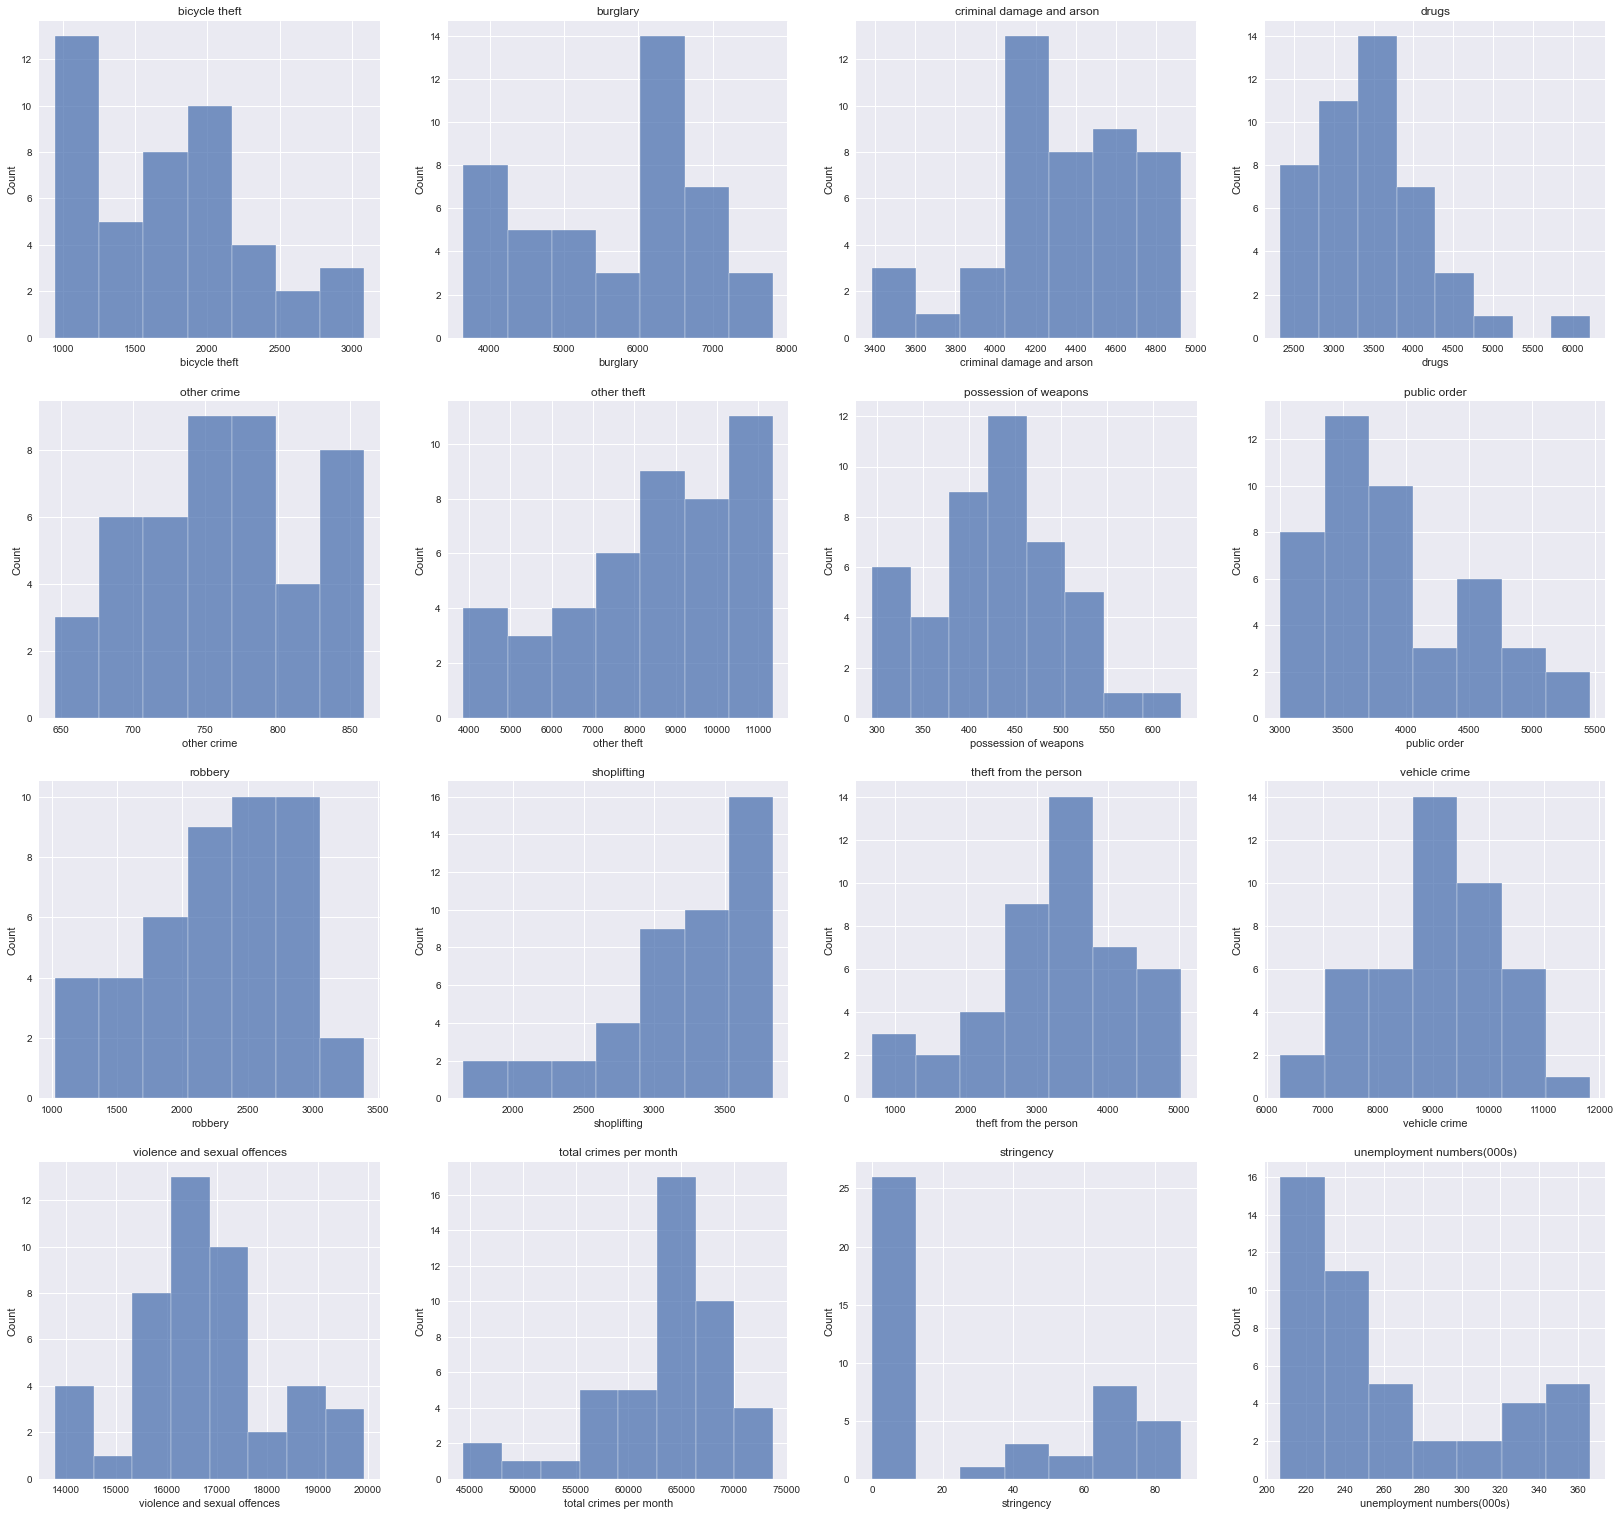

In [177]:
# Histograms for each 
plt.style.use('seaborn')
fig, ax = plt.subplots(4, 4, figsize=(25,25))
ax = ax.flatten()
for i, _ in enumerate(columns_num):
    sns.histplot(data=df[columns_num[i]], ax=ax[i])
    ax[i].set_title(columns_num[i])
plt.show()

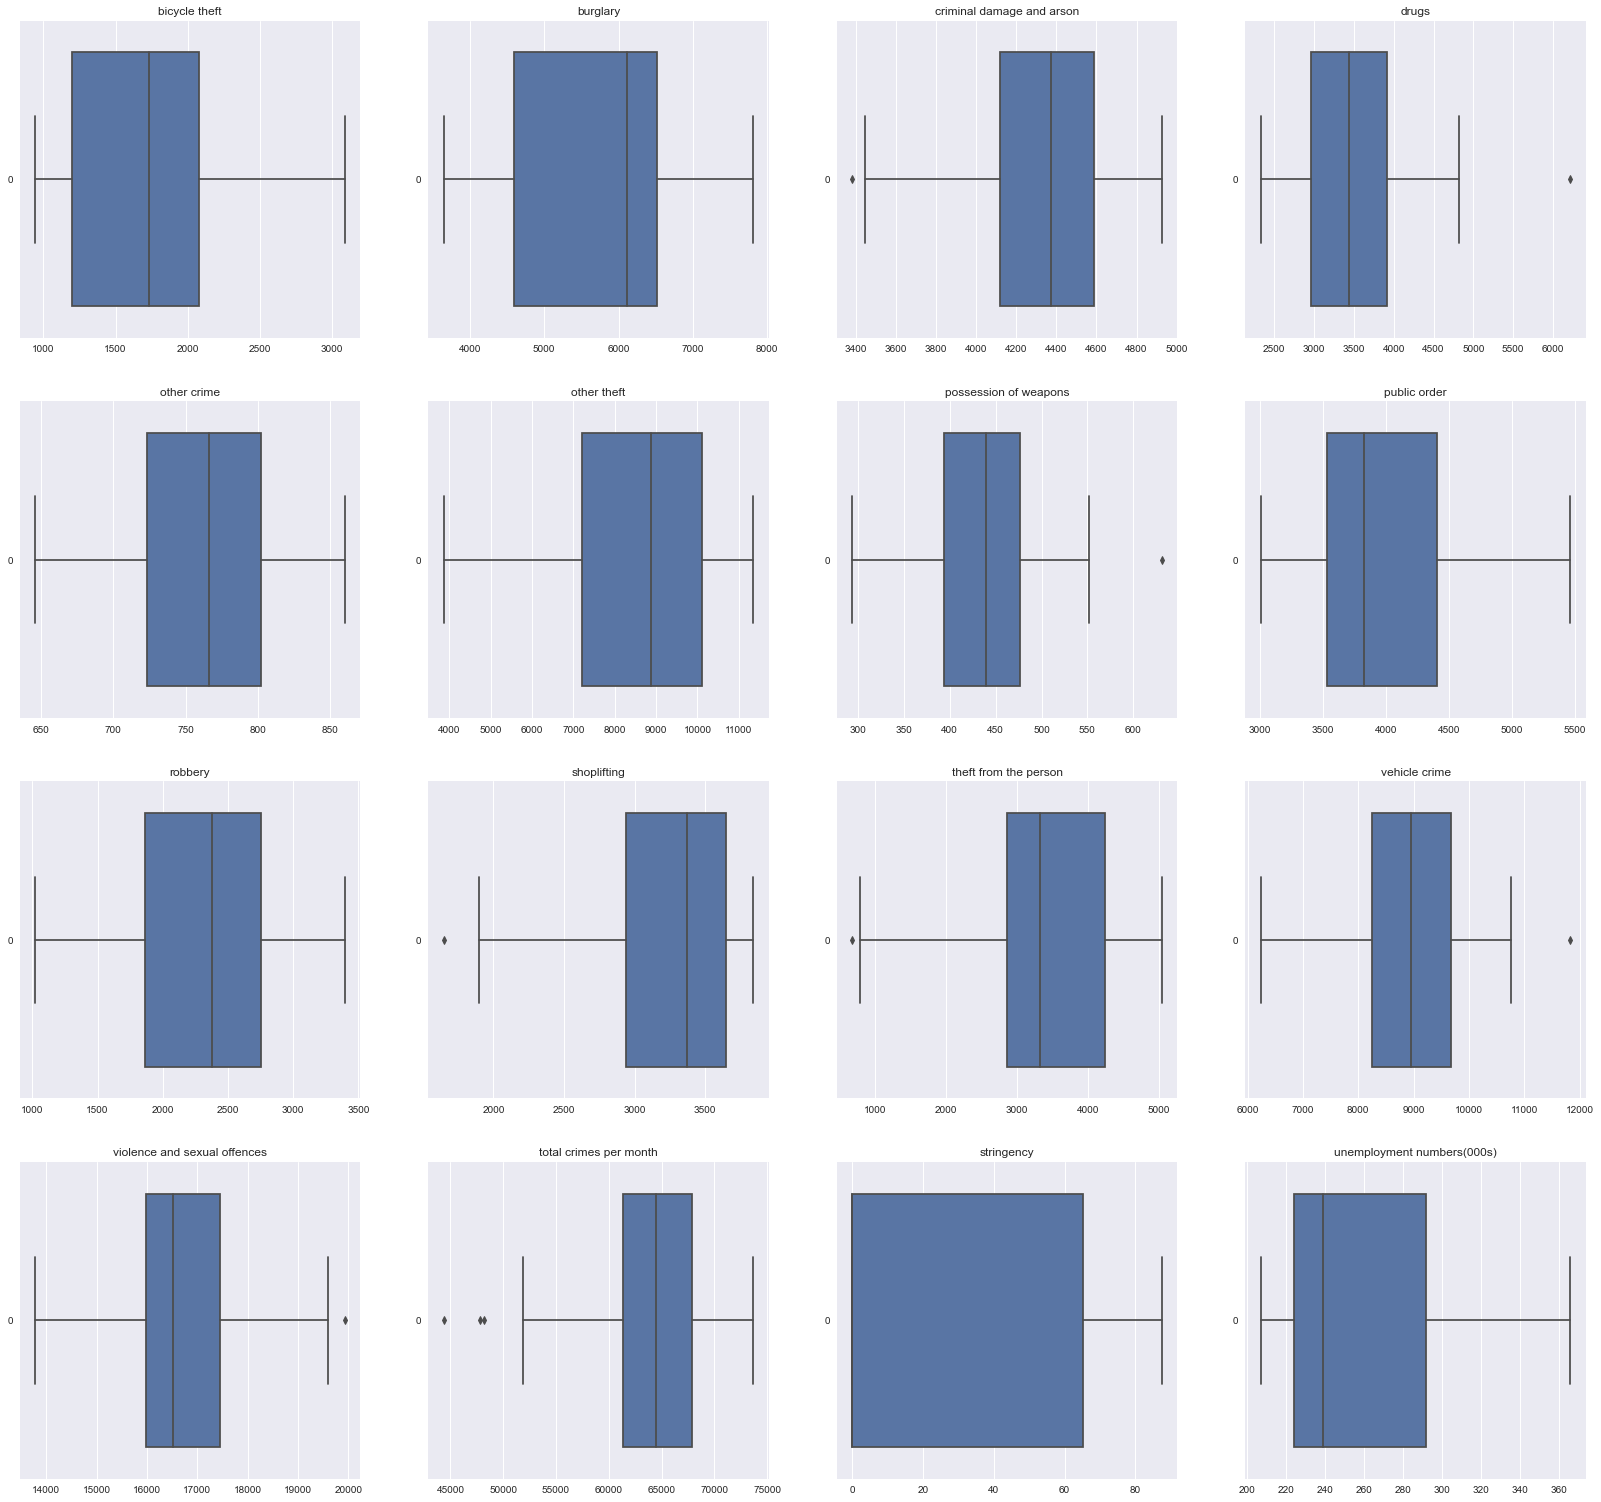

In [179]:
# Boxplots
plt.style.use('seaborn')
fig, ax = plt.subplots(4, 4, figsize=(25,25))
ax = ax.flatten()
for i, _ in enumerate(columns_num):
    sns.boxplot(data=df[columns_num[i]], ax=ax[i], orient="h")
    ax[i].set_title(columns_num[i])
plt.show()

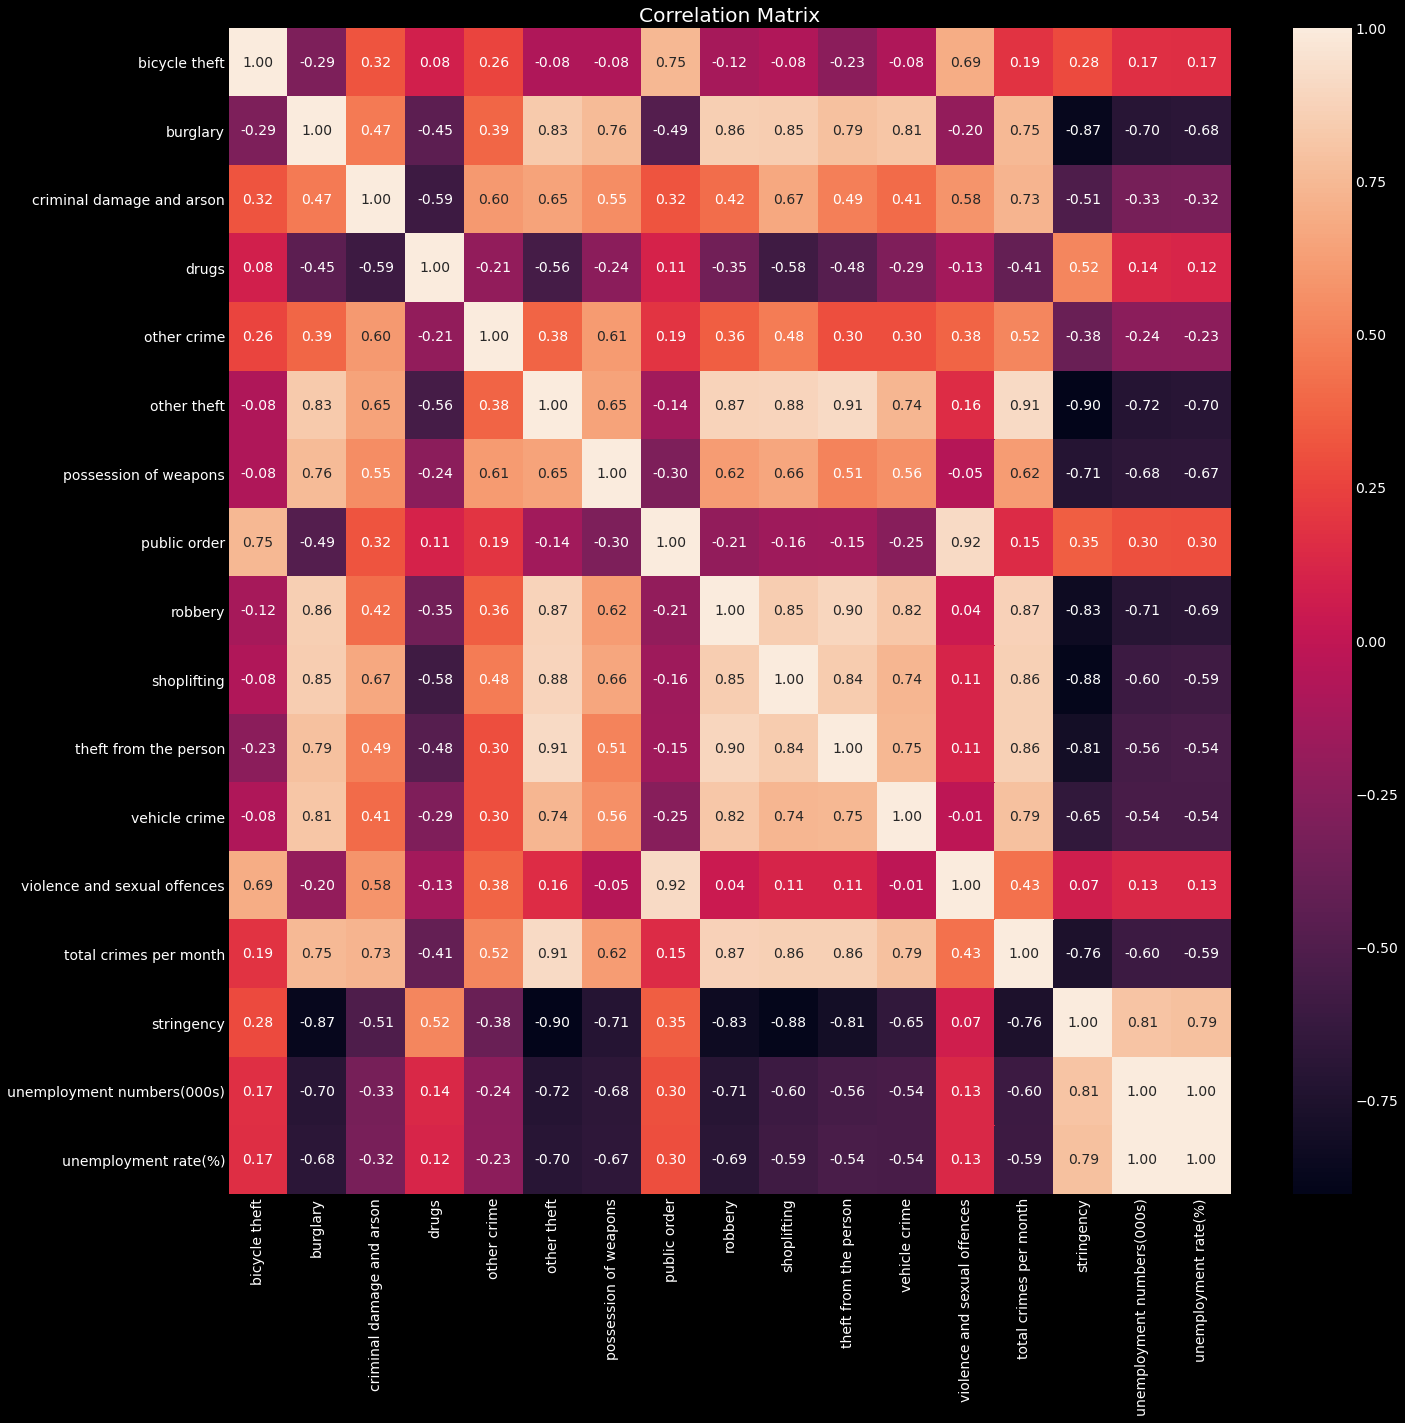

In [143]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.2f', color='purple')
plt.title('Correlation Matrix')
plt.show()
f.savefig('Data Correlation Matrix')

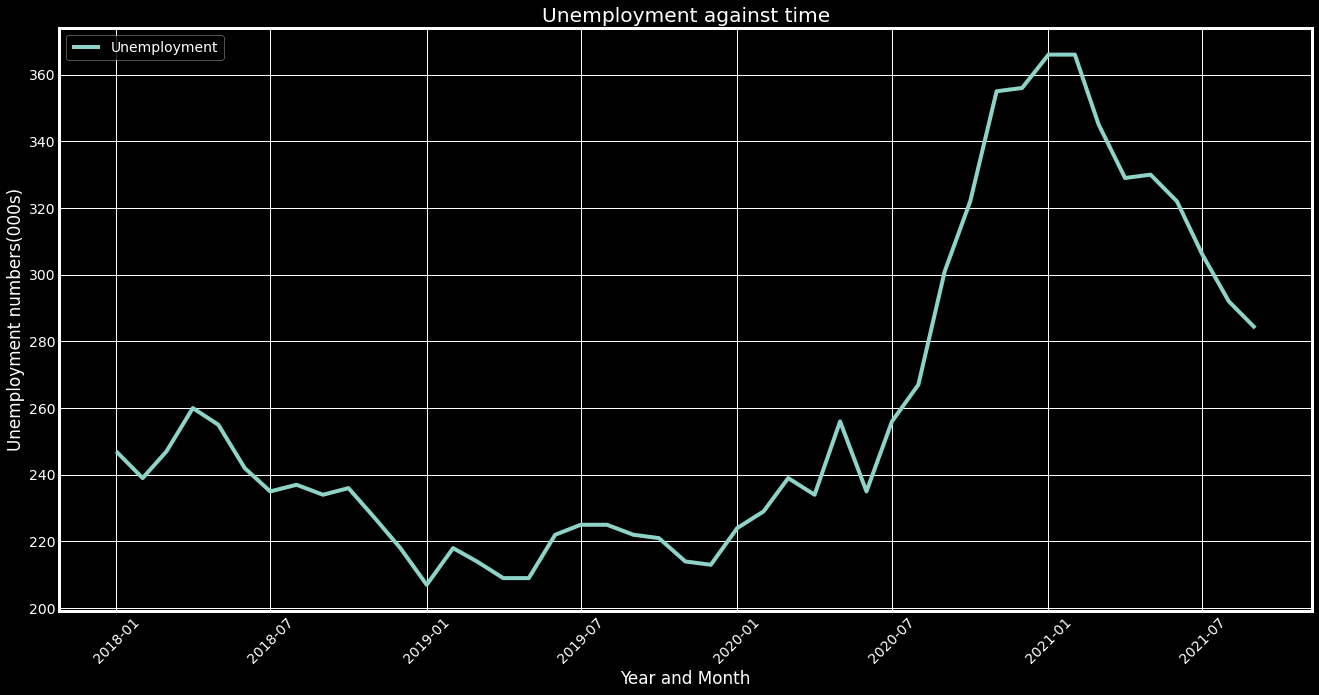

In [144]:
plt.figure(figsize=(20,10))

plt.plot(df['month'], df["unemployment numbers(000s)"], label = 'Unemployment')

plt.xlabel('Year and Month')
plt.ylabel('Unemployment numbers(000s)')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Unemployment against time')

plt.show()

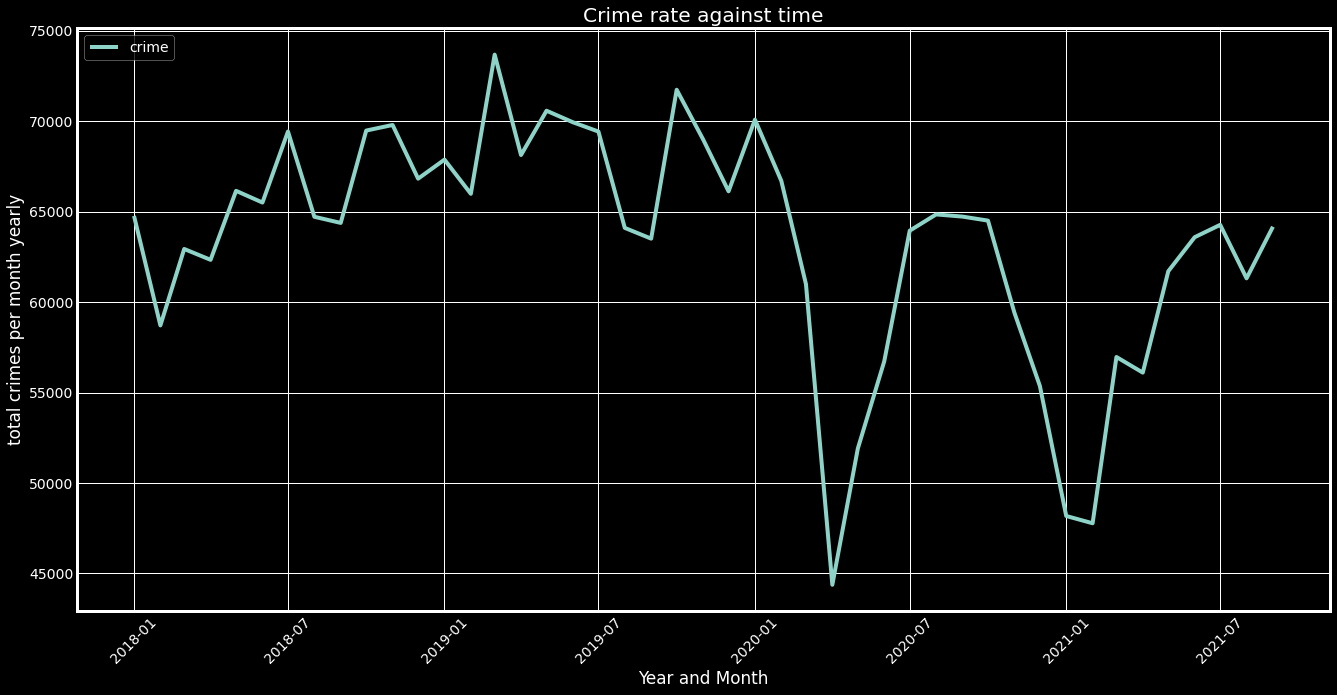

In [145]:
plt.figure(figsize=(20,10))

plt.plot(df['month'], df['total crimes per month'], label = 'crime')

plt.xlabel('Year and Month')
plt.ylabel('total crimes per month yearly')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Crime rate against time')
plt.show()

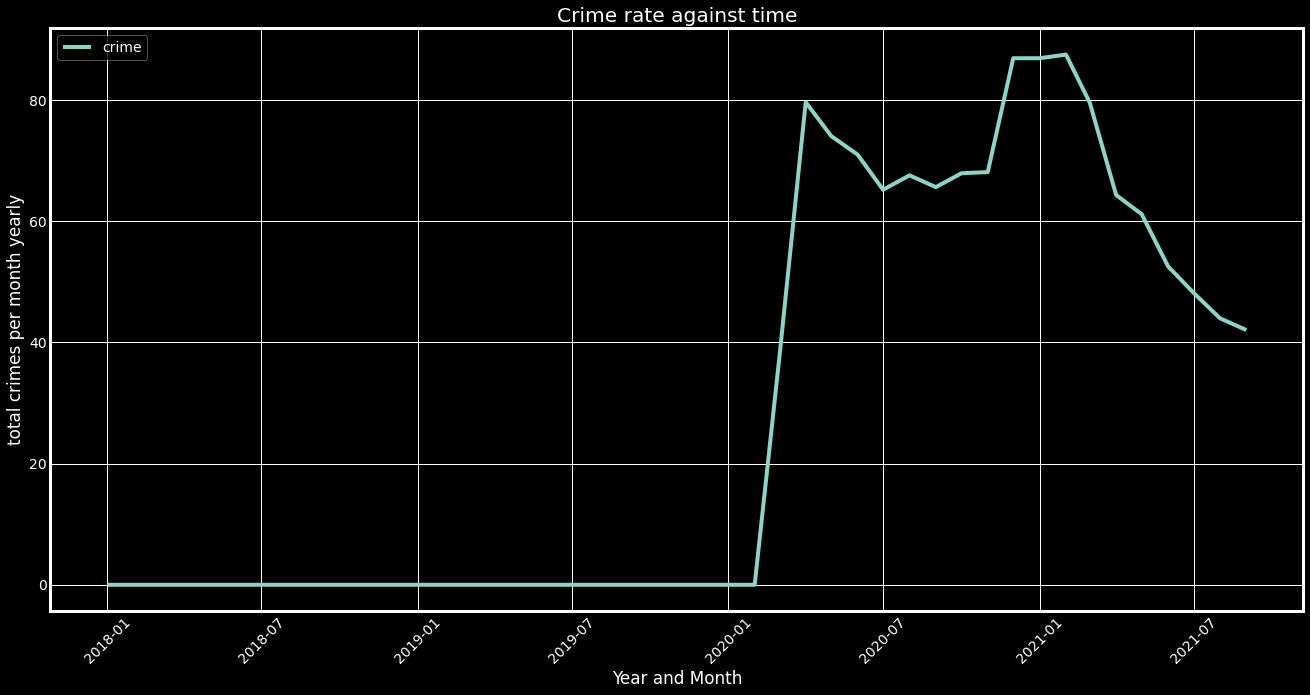

In [153]:
plt.figure(figsize=(20,10))

plt.plot(df['month'], df['stringency'], label = 'crime')

plt.xlabel('Year and Month')
plt.ylabel('Stringency per month yearly')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Crime rate against time')
plt.show()

### Other Cities

In [41]:
# read and display first 3 rows of the data
other_cities = pd.read_csv('data/other_cities_df.csv')
other_cities.head()

Unnamed: 0    month            reported by  longitude   latitude  \
0           0  2018-01  West Yorkshire Police  -1.388671  53.935321   
1           1  2018-01  West Yorkshire Police  -1.391328  53.938003   
2           2  2018-01  West Yorkshire Police  -1.388828  53.936031   
3           3  2018-01  West Yorkshire Police  -1.391328  53.938003   
4           4  2018-01  West Yorkshire Police  -1.389567  53.938615   

                     location  lsoa code lsoa name  \
0     On or near Coxwold View    1011698     Leeds   
1      On or near Supermarket    1011698     Leeds   
2     On or near Coxwold Hill    1011698     Leeds   
3      On or near Supermarket    1011698     Leeds   
4  On or near Ainsty Crescent    1011698     Leeds   

                     crime type  \
0     Criminal damage and arson   
1                   Shoplifting   
2                 Vehicle crime   
3  Violence and sexual offences   
4  Violence and sexual offences   

                           last outcome category  covid     date  stringency  
0  Investigation complete; no suspect identified      0  2018-01         0.0  
1  Investigation complete; no suspect identified      0  2018-01         0.0  
2  Investigation complete; no suspect identified      0  2018-01         0.0  
3                    Unable to prosecute suspect      0  2018-01         0.0  
4              Offender given community sentence      0  2018-01         0.0

In [42]:
other_cities.drop('Unnamed: 0', inplace=True, axis=1) 

In [43]:
# display data shape
other_cities.shape

(1220535, 12)

In [44]:
# display data information 
other_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220535 entries, 0 to 1220534
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   month                  1220535 non-null  object 
 1   reported by            1220535 non-null  object 
 2   longitude              1220535 non-null  float64
 3   latitude               1220535 non-null  float64
 4   location               1220535 non-null  object 
 5   lsoa code              1220535 non-null  int64  
 6   lsoa name              1220535 non-null  object 
 7   crime type             1220535 non-null  object 
 8   last outcome category  1220535 non-null  object 
 9   covid                  1220535 non-null  int64  
 10  date                   1220535 non-null  object 
 11  stringency             1220535 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 111.7+ MB


In [45]:
# describe the data
other_cities.describe()

longitude      latitude     lsoa code         covid    stringency
count  1.220535e+06  1.220535e+06  1.220535e+06  1.220535e+06  1.220535e+06
mean  -1.988273e+00  5.333139e+01  1.014244e+06  4.088478e-01  2.638383e+01
std    5.759625e-01  7.865032e-01  8.898407e+03  4.916213e-01  3.310498e+01
min   -3.002089e+00  5.139996e+01  1.006512e+06  0.000000e+00  0.000000e+00
25%   -2.591272e+00  5.338264e+01  1.008098e+06  0.000000e+00  0.000000e+00
50%   -1.732999e+00  5.374436e+01  1.011322e+06  0.000000e+00  0.000000e+00
75%   -1.527028e+00  5.380211e+01  1.014542e+06  1.000000e+00  6.430310e+01
max   -1.306890e+00  5.394893e+01  1.033768e+06  1.000000e+00  8.748037e+01

In [46]:
#check for null values in dataset
other_cities.isna().sum()

month                    0
reported by              0
longitude                0
latitude                 0
location                 0
lsoa code                0
lsoa name                0
crime type               0
last outcome category    0
covid                    0
date                     0
stringency               0
dtype: int64

In [47]:
# display total number of street crimes reported per city 
other_cities['lsoa name'].value_counts()

Leeds        366495
Bradford     261950
Liverpool    223188
Sheffield    194924
Bristol      173978
Name: lsoa name, dtype: int64

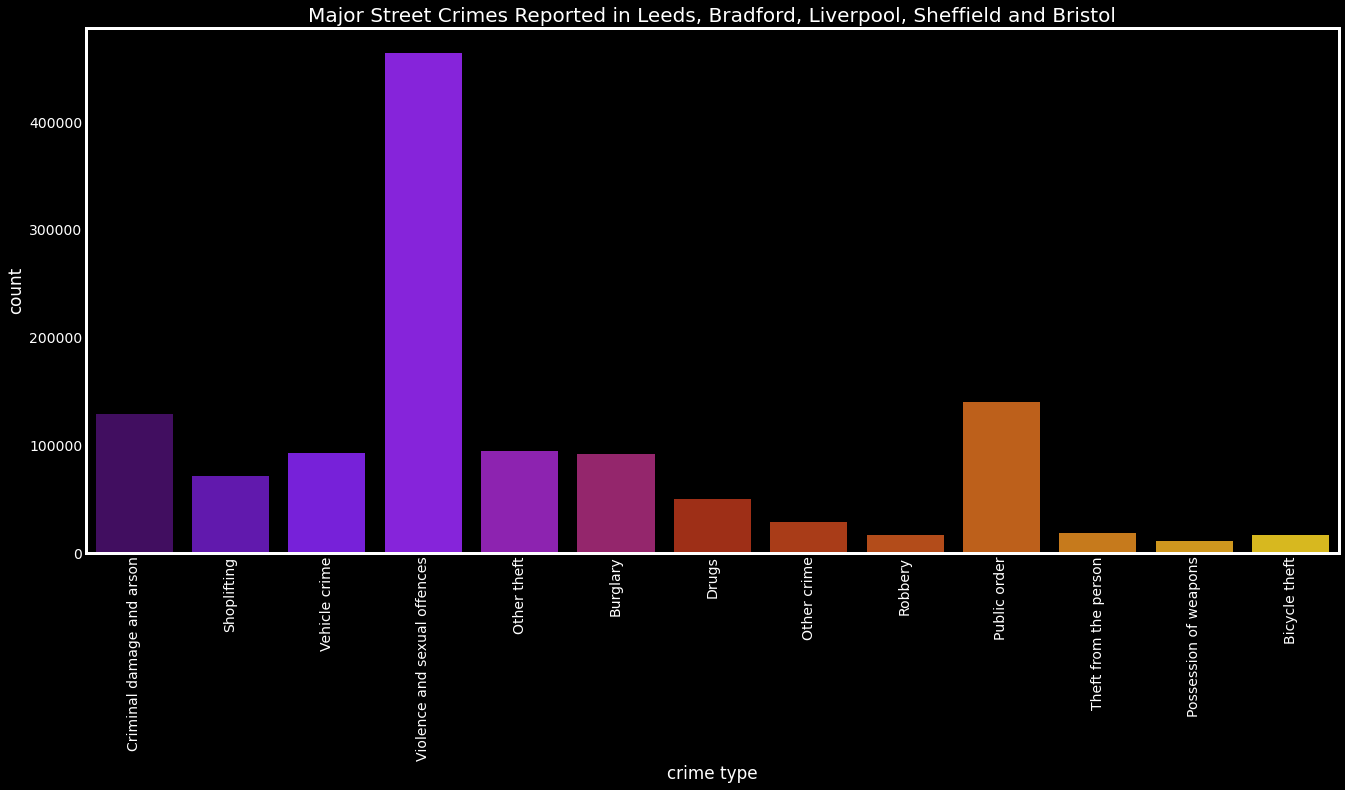

In [33]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(other_cities['crime type'], palette = 'gnuplot')

plt.title('Major Street Crimes Reported in Leeds, Bradford, Liverpool, Sheffield and Bristol', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

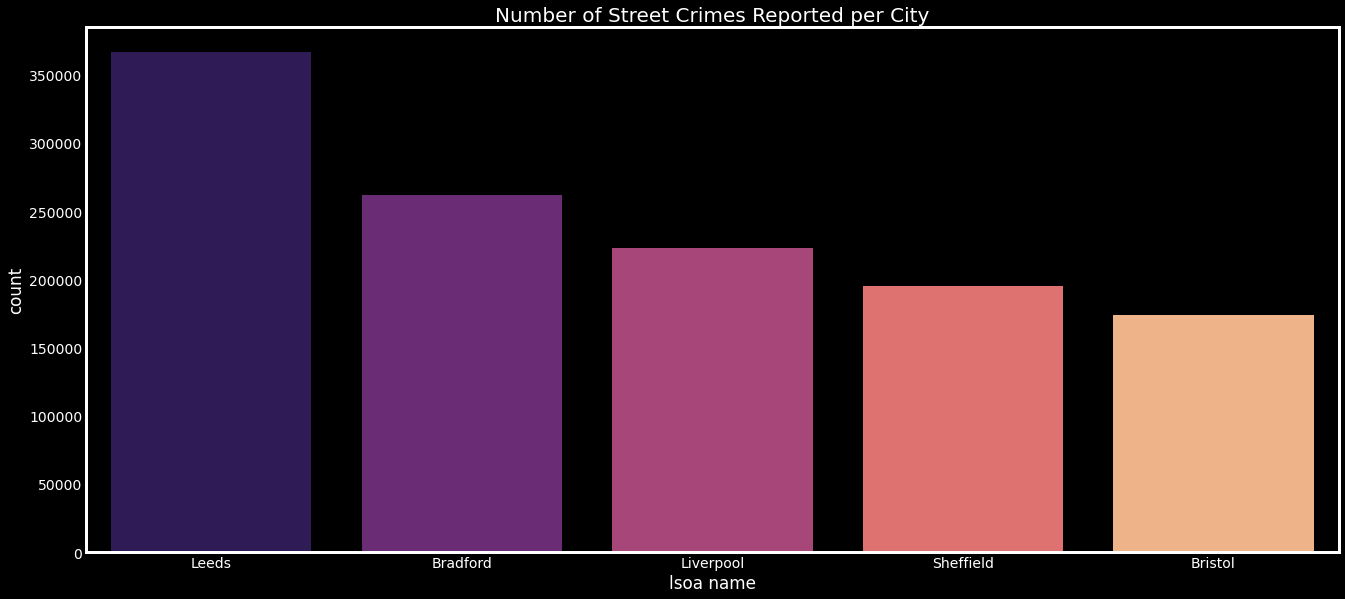

In [77]:
# count of crimes per city

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(other_cities['lsoa name'], palette = 'magma')

plt.title('Number of Street Crimes Reported per City', fontweight = 30, fontsize = 20)
#plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

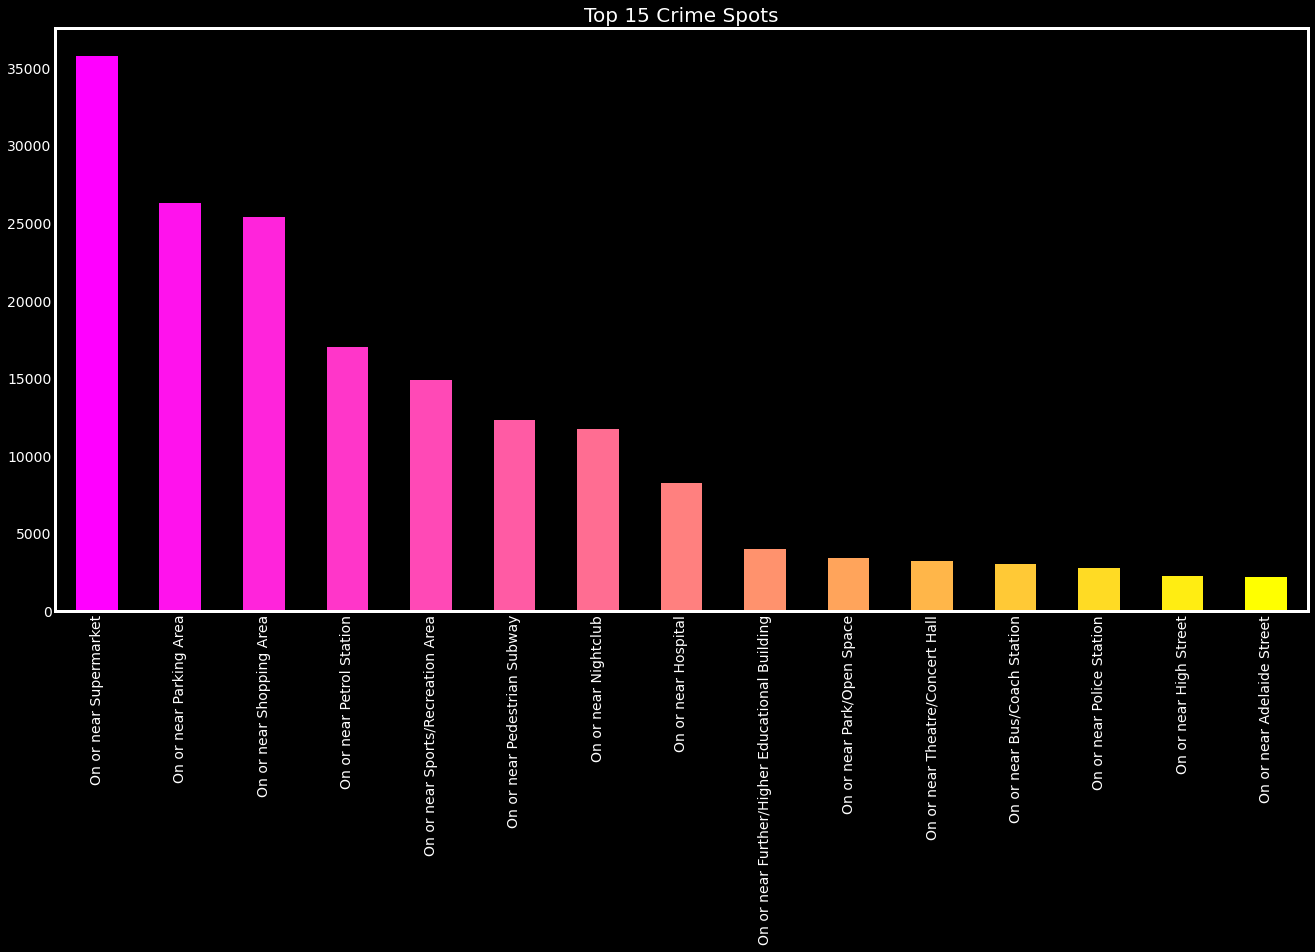

In [51]:
# display top crime locations

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

color = plt.cm.spring(np.linspace(0, 1, 15))
other_cities['location'].value_counts().head(15).plot.bar(color = color, figsize = (20, 10))

plt.title('Top 15 Crime Spots',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(b=None)
plt.show()

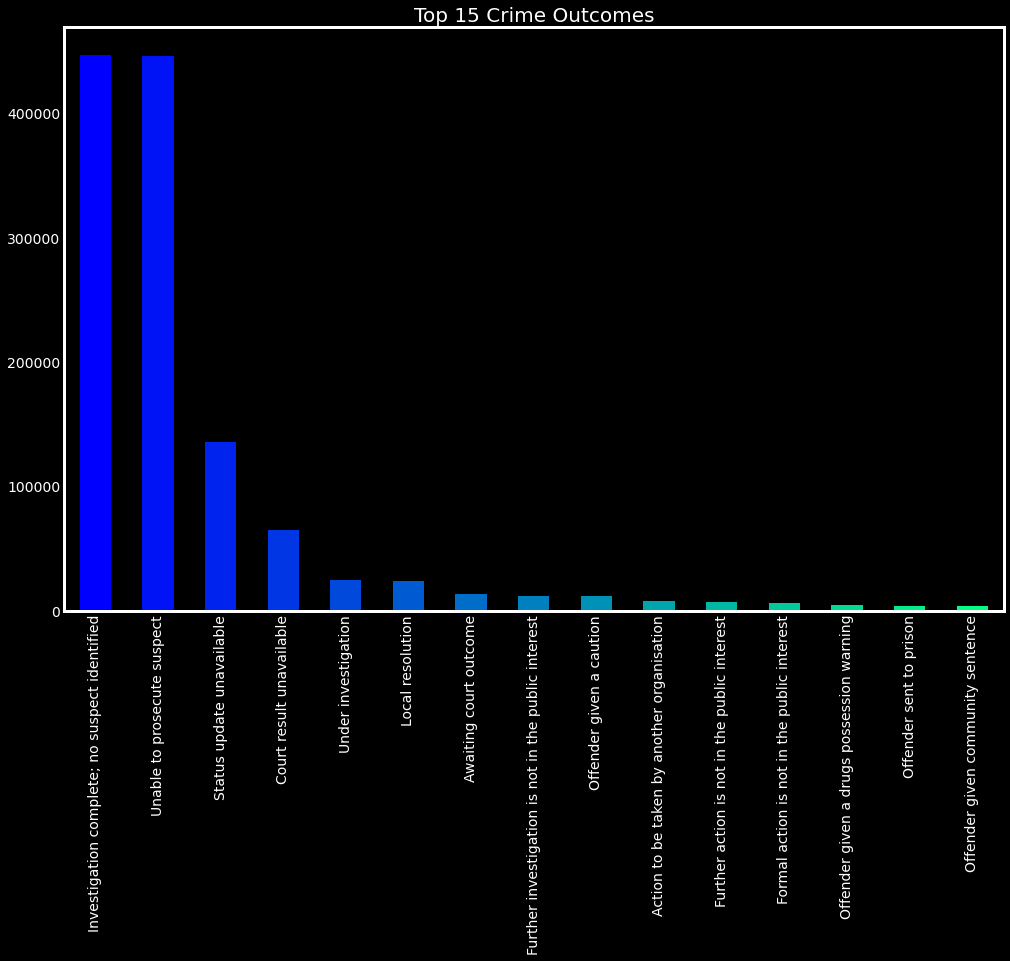

In [52]:
# display outcomes of top 15 crimes reported

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

color = plt.cm.winter(np.linspace(0, 1, 15))
other_cities['last outcome category'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 Crime Outcomes',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(b=None)
plt.show()

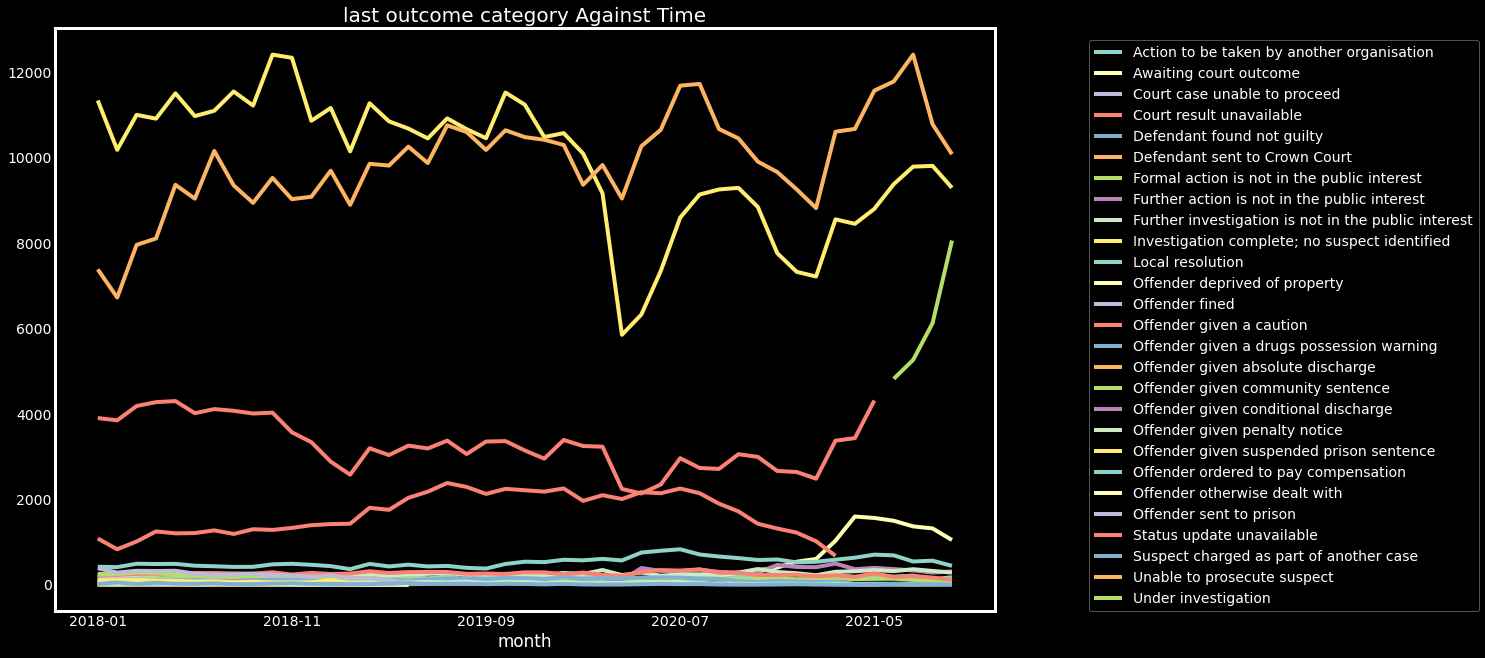

In [53]:
plt.style.use('dark_background')
m = other_cities.groupby(['month', 'last outcome category']).size().unstack().plot.line(figsize=(15, 10))
plt.title('last outcome category Against Time',fontsize = 20)
plt.grid(b=None)
m.legend(loc=(1.1,0))

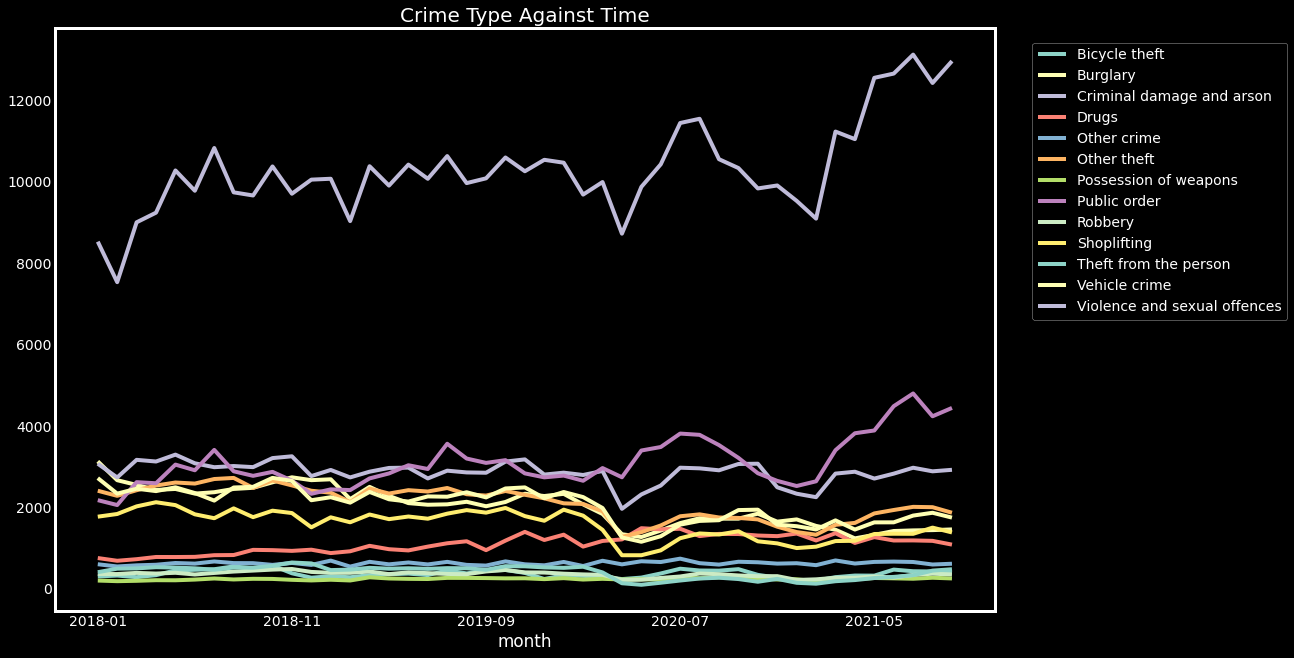

In [54]:
m = other_cities.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)

plt.title('Crime Type Against Time',fontsize = 20)

m.legend(loc=(1.04,0.5))

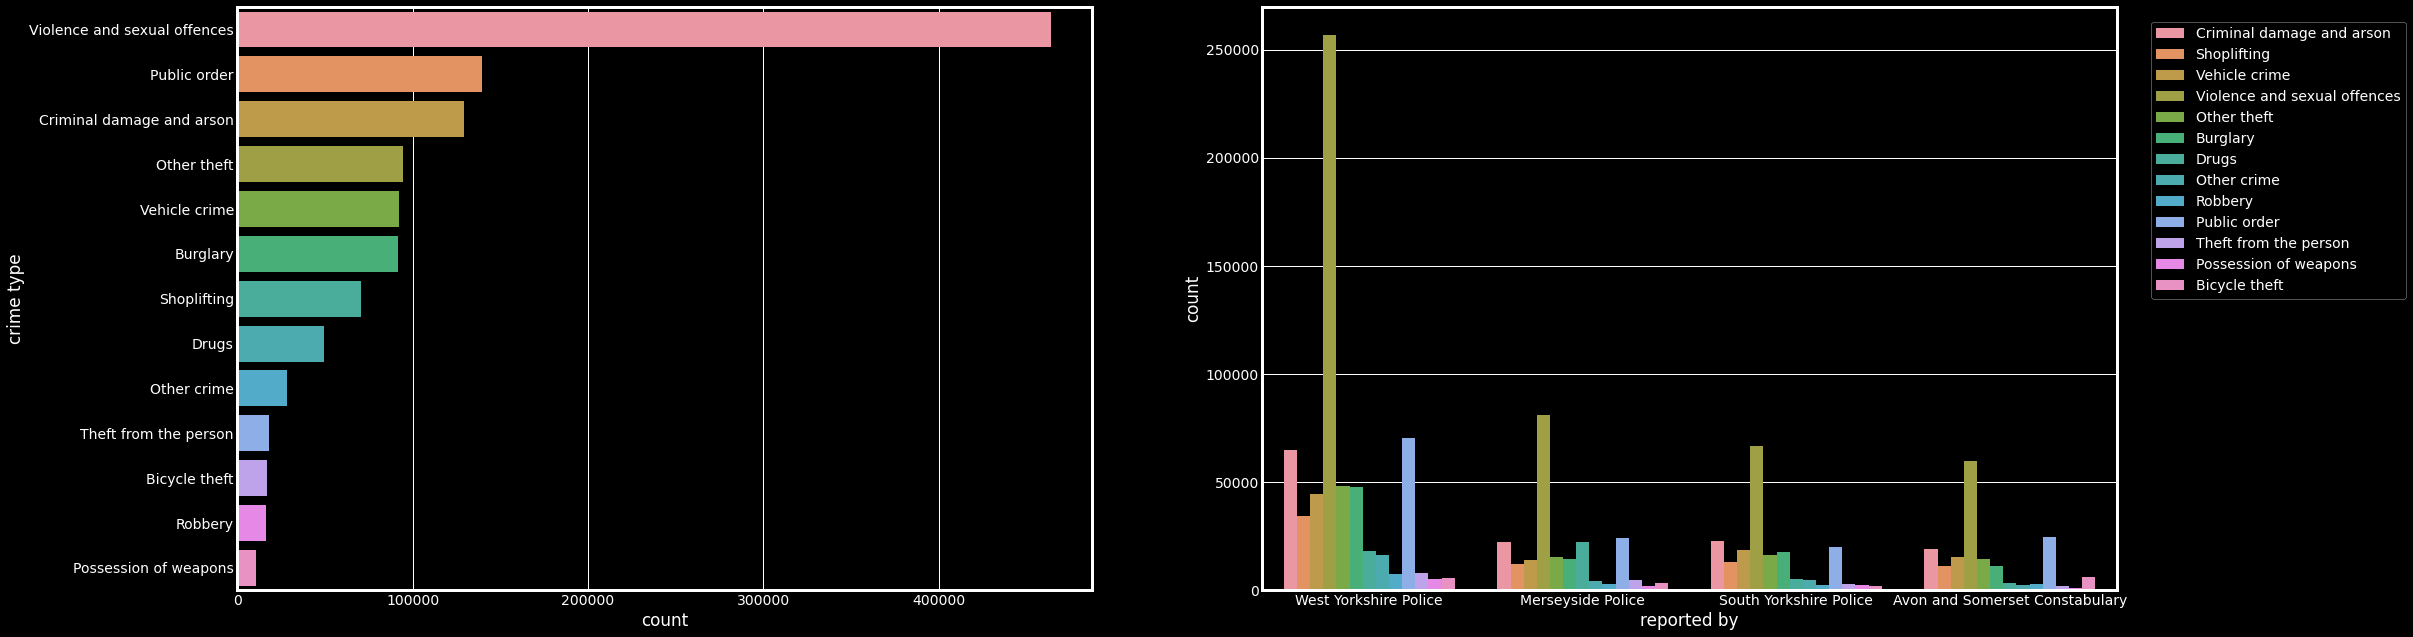

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(30,10))
sns.countplot(y='crime type', data=other_cities, order=other_cities['crime type'].value_counts().index, ax=axs[0])
m = sns.countplot(x='reported by', hue='crime type', data=other_cities, order = other_cities['reported by'].value_counts().index, ax=axs[1] )
m.legend(loc=(1.04,0.5))
plt.show()

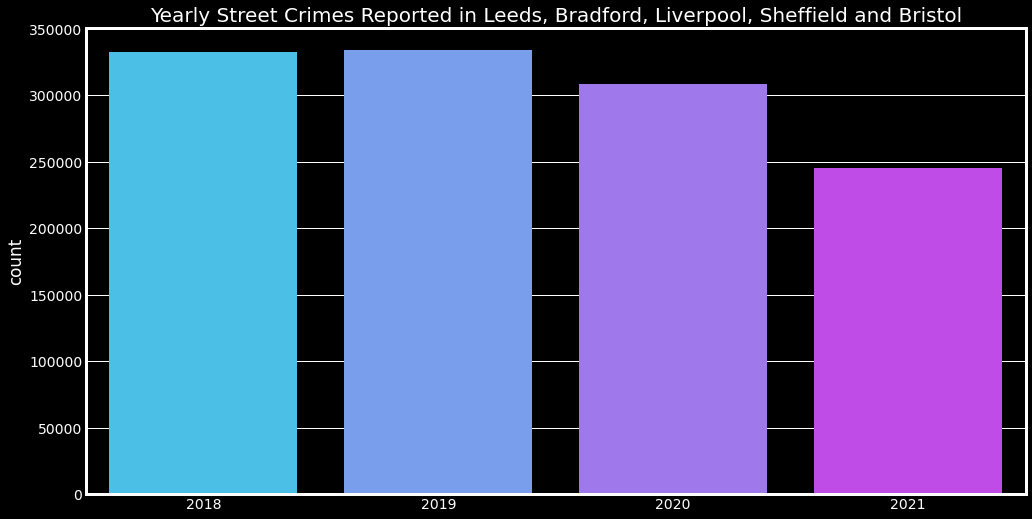

In [58]:
# display total crimes per year per city

other_cities['month'] = pd.to_datetime(other_cities['month'])

other_cities[''] = other_cities['month'].dt.year

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(other_cities[''], palette = 'cool',)
plt.title('Yearly Street Crimes Reported in Leeds, Bradford, Liverpool, Sheffield and Bristol', fontsize = 20)

plt.show()

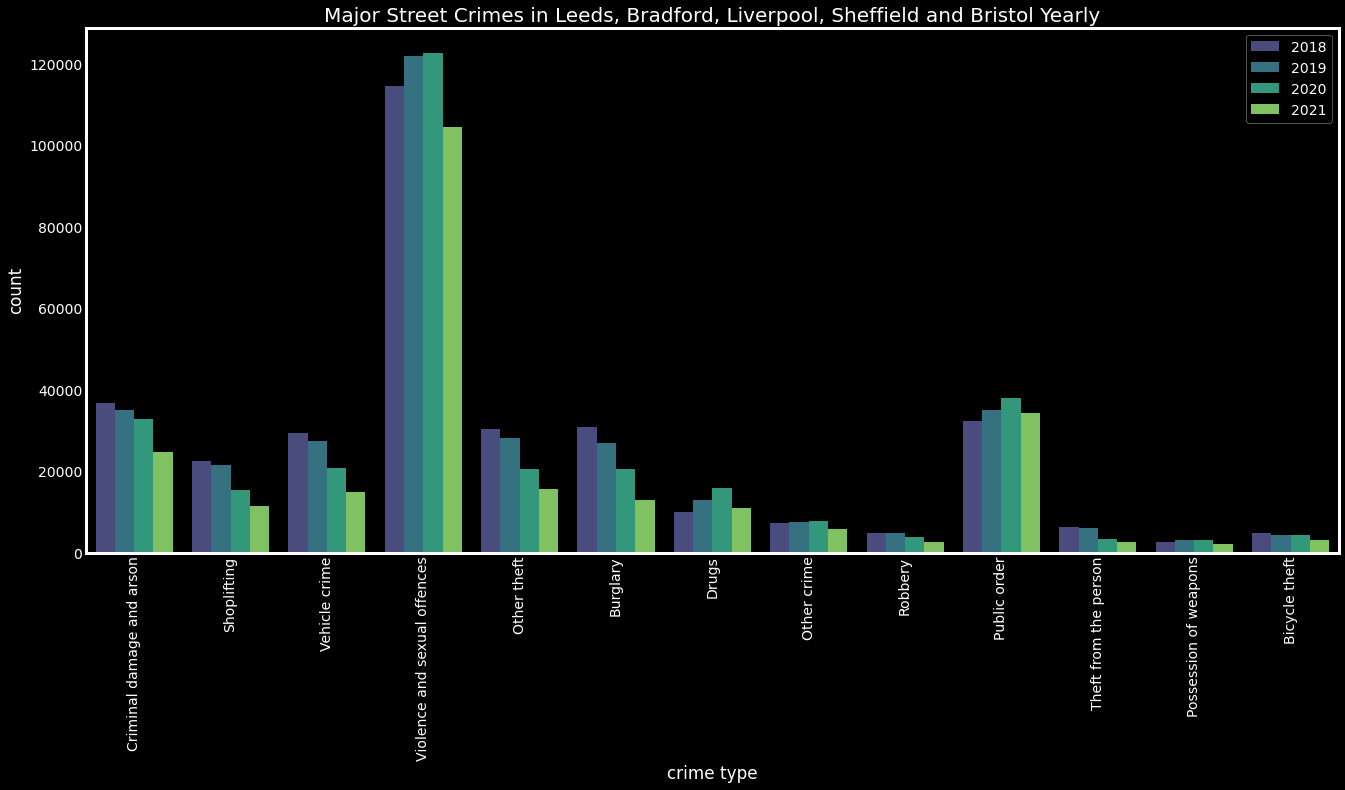

In [60]:
# display total crimes per year per city

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(other_cities['crime type'], hue=other_cities[''], palette = 'viridis')

plt.title('Major Street Crimes in Leeds, Bradford, Liverpool, Sheffield and Bristol Yearly', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

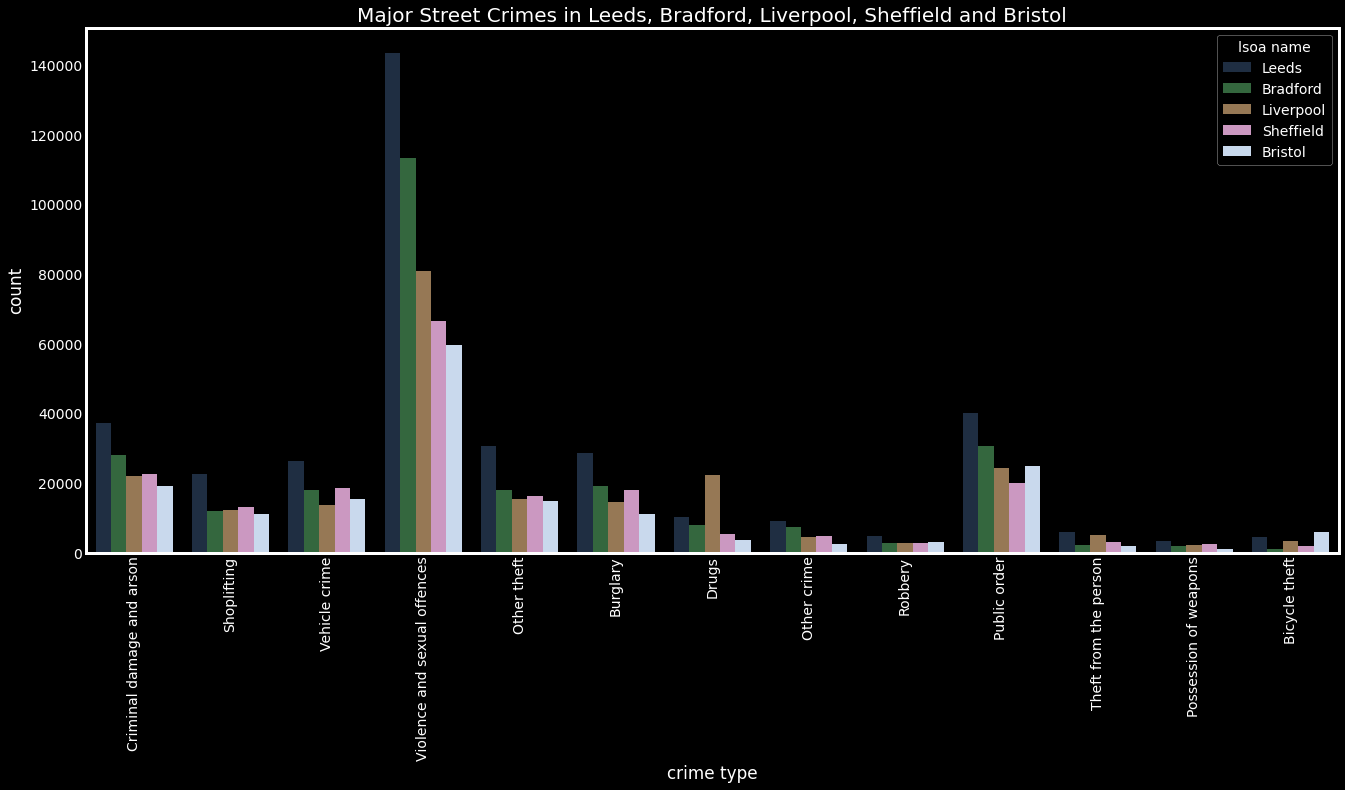

In [75]:
# display total crimes per year per city

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(other_cities['crime type'], hue=other_cities['lsoa name'], palette = 'cubehelix')

plt.title('Major Street Crimes in Leeds, Bradford, Liverpool, Sheffield and Bristol', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

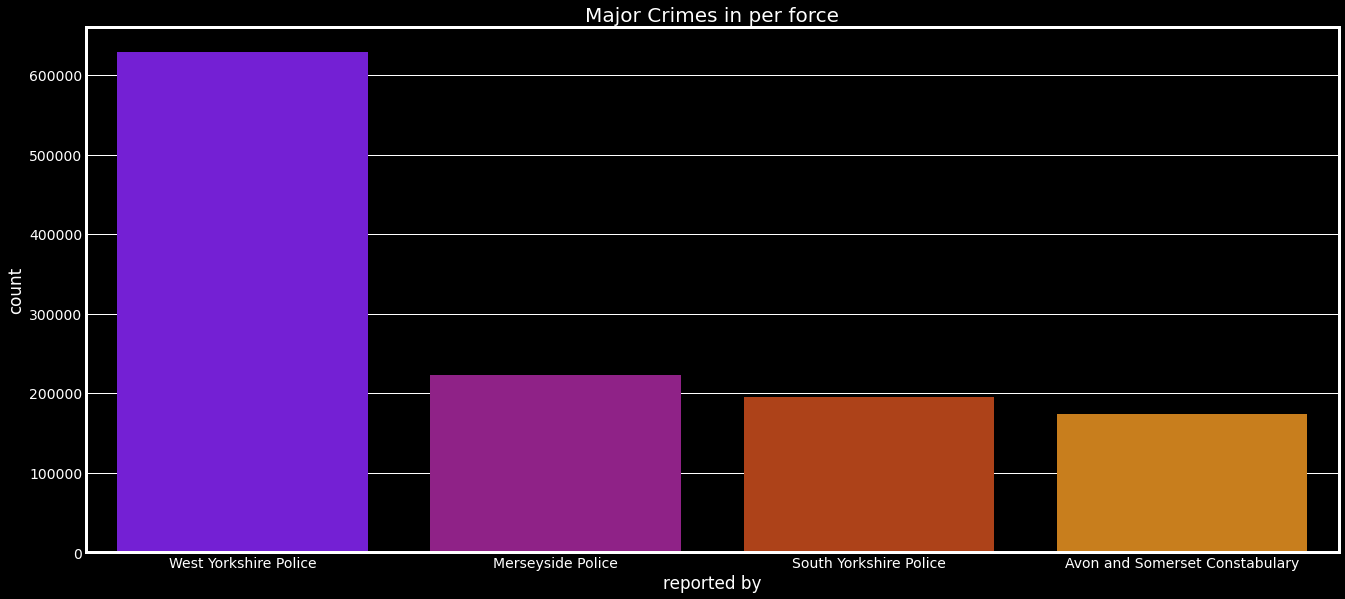

In [78]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(other_cities['reported by'], palette = 'gnuplot')

plt.title('Major Crimes in per force', fontweight = 30, fontsize = 20)
#plt.xticks()
#plt.grid(False)
plt.show()

In [86]:
leeds_data = other_cities[other_cities['lsoa name'] == 'Leeds']
bradford_data = other_cities[other_cities['lsoa name'] == 'Bradford']
liverpool_data = other_cities[other_cities['lsoa name'] == 'Liverpool']
sheffield_data = other_cities[other_cities['lsoa name'] == 'Sheffield']
bristol_data = other_cities[other_cities['lsoa name'] == 'Bristol']

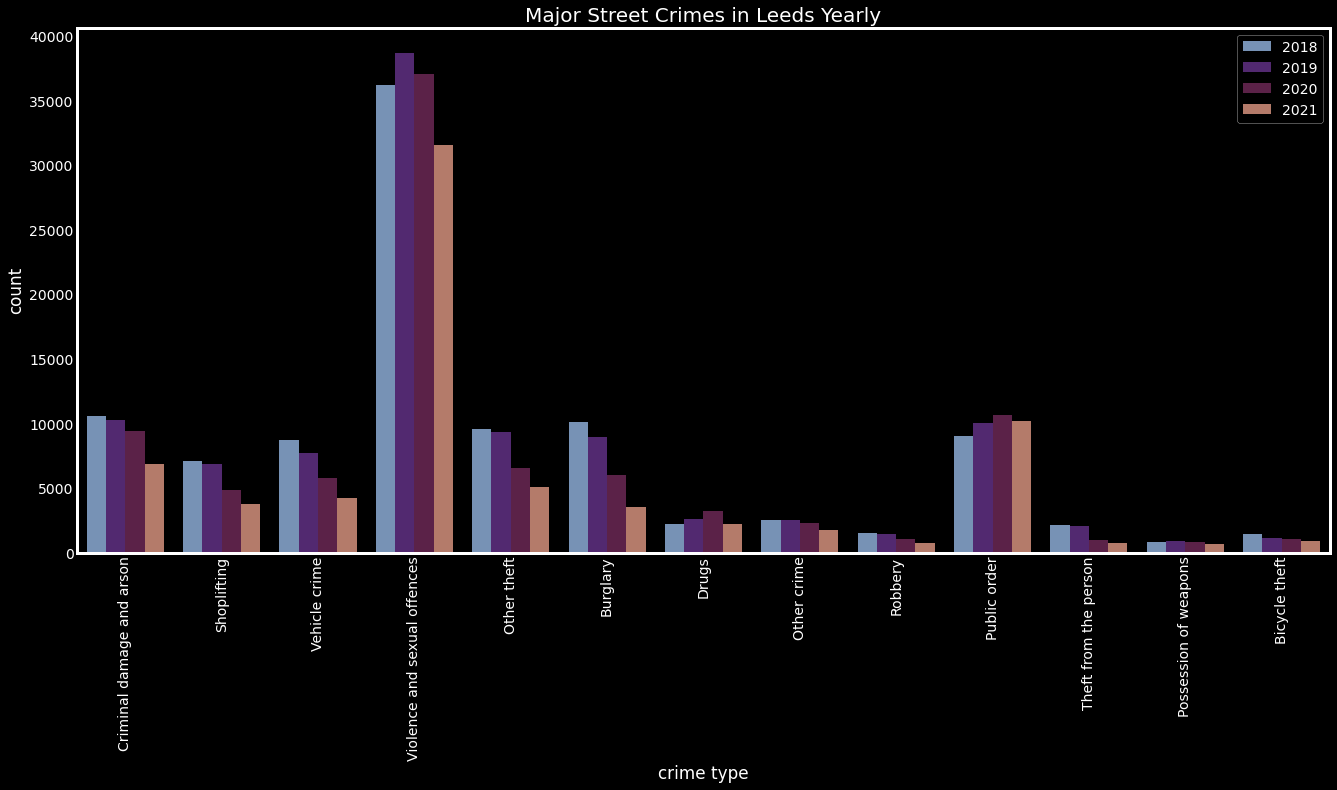

In [114]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(leeds_data['crime type'], hue=leeds_data[''], palette = 'twilight')

plt.title('Major Street Crimes in Leeds Yearly', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

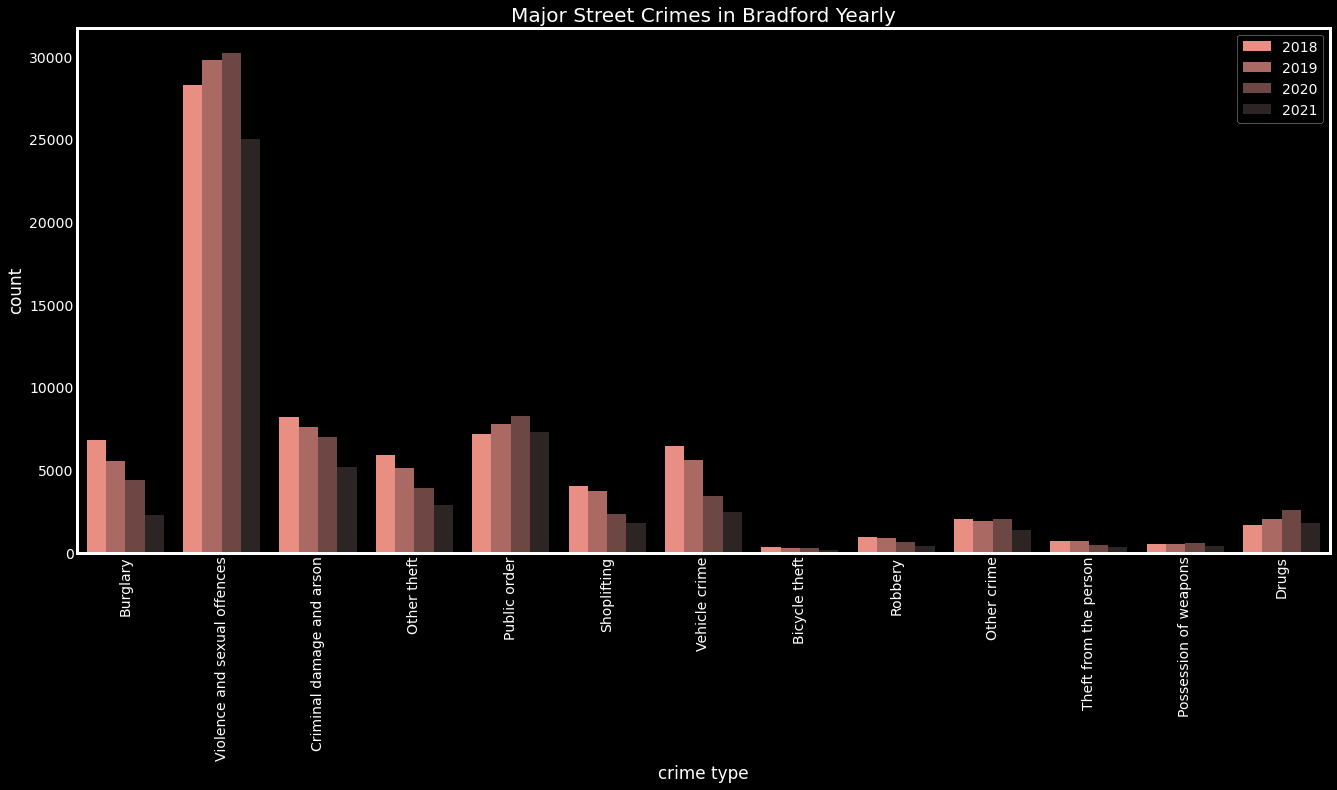

In [93]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(bradford_data['crime type'], hue=bradford_data[''], palette = 'dark:salmon_r')

plt.title('Major Street Crimes in Bradford Yearly', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

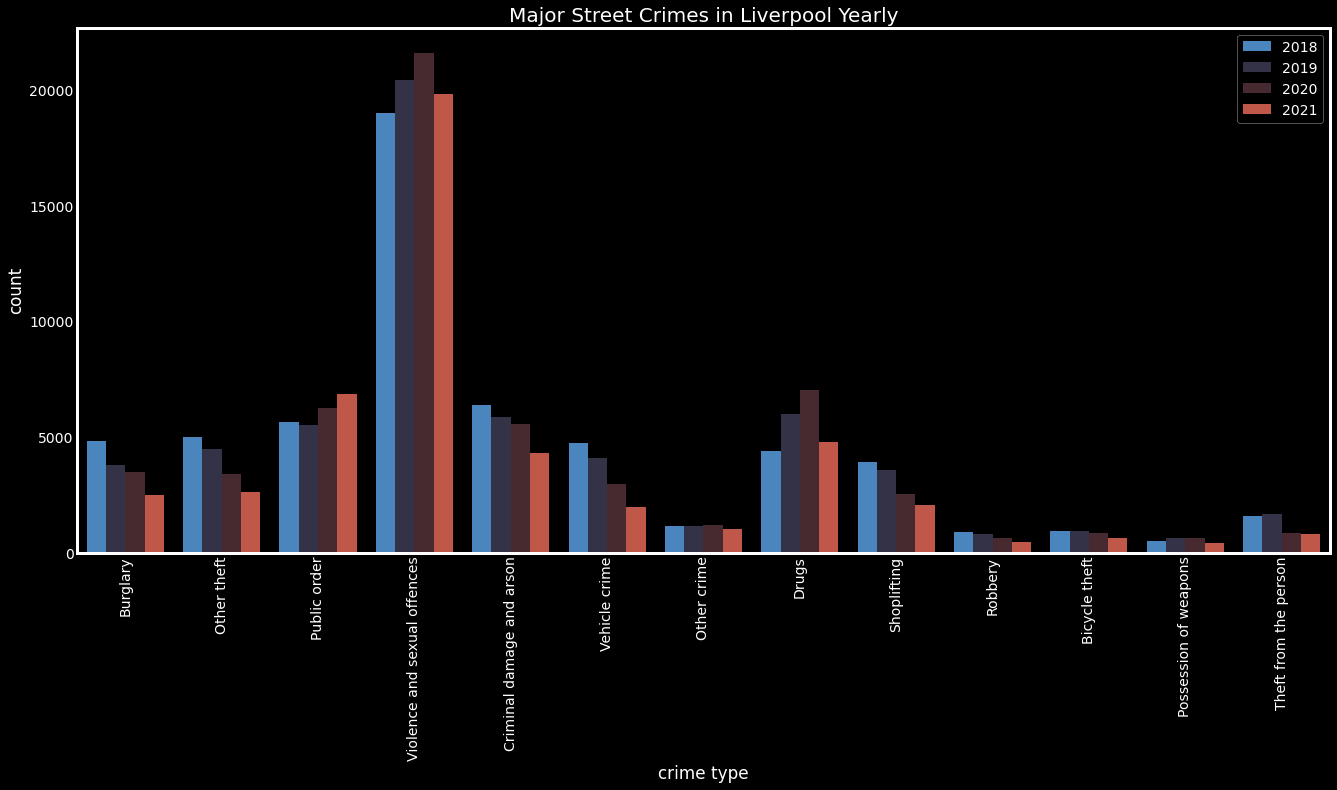

In [94]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(liverpool_data['crime type'], hue=liverpool_data[''], palette = 'icefire')

plt.title('Major Street Crimes in Liverpool Yearly', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

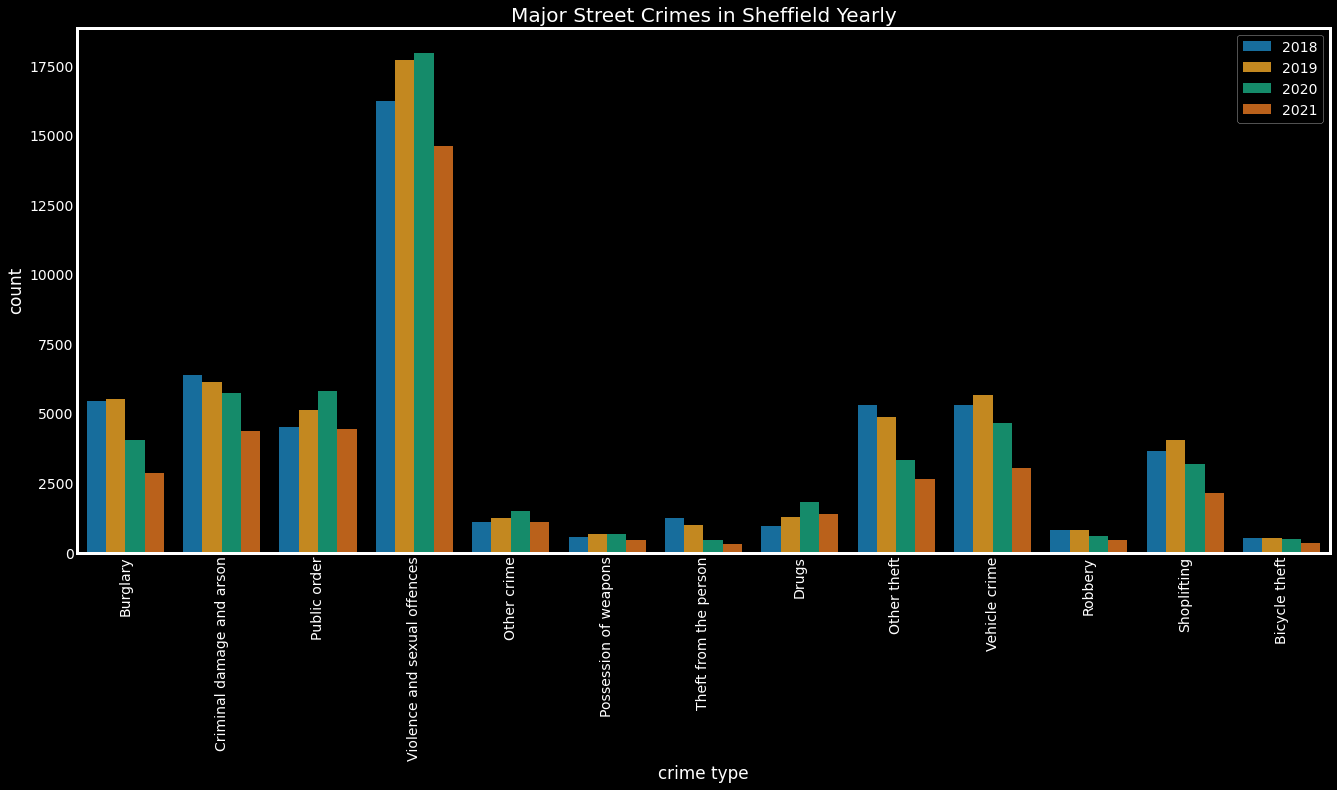

In [97]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(sheffield_data['crime type'], hue=sheffield_data[''], palette = 'colorblind')

plt.title('Major Street Crimes in Sheffield Yearly', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

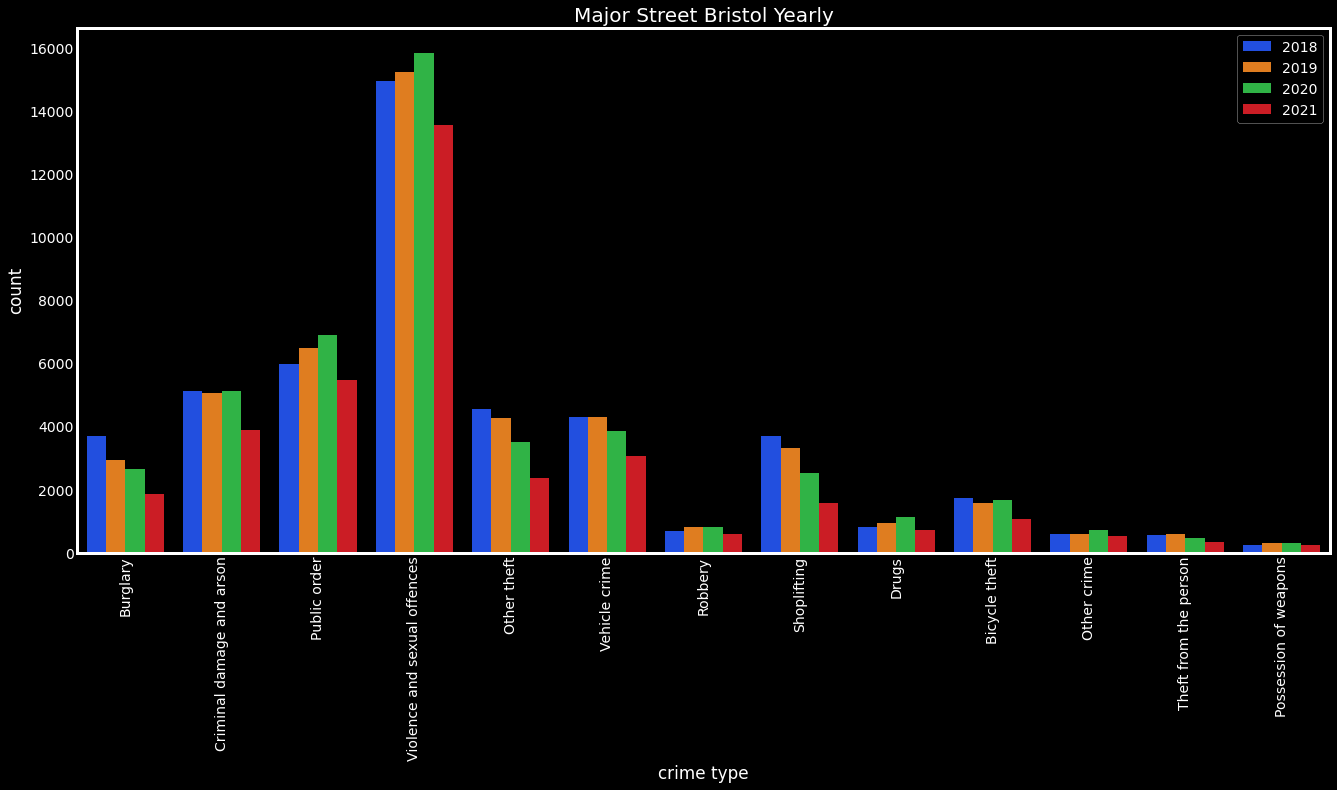

In [98]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(bristol_data['crime type'], hue=bristol_data[''], palette = 'bright')

plt.title('Major Street Bristol Yearly', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

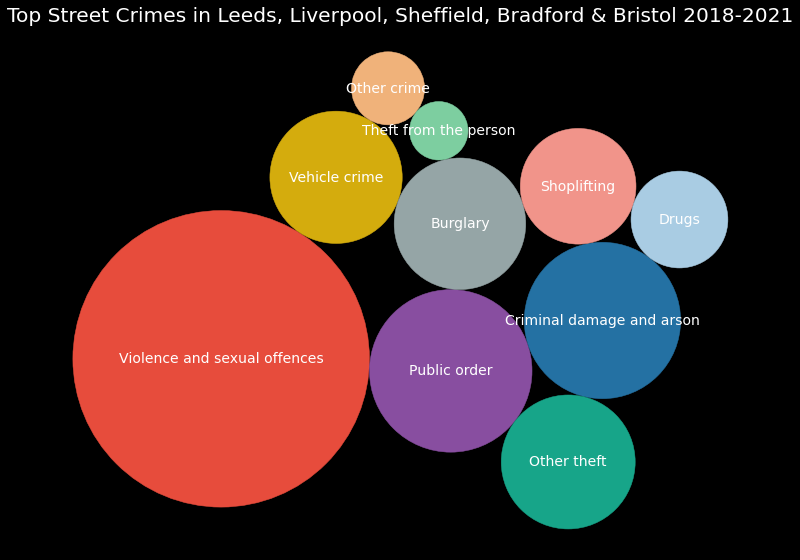

In [34]:
# another visualisation for top street crimes reported

other_cities = {
    'crime_type': ['Violence and sexual offences', 'Public order', 'Criminal damage and arson', 'Other theft', 'Vehicle crime', 'Burglary', 'Shoplifting', 'Drugs', 'Other crime', 'Theft from the person'],
    'crime_numbers': [463991, 139385, 129031, 94682, 92373, 91292, 70628, 49485, 28174, 18043],
    'color': ['#E74C3C', '#884EA0', '#2471A3', '#17A589', '#D4AC0D', '#95A5A6', '#F1948A', '#A9CCE3', '#F0B27A', '#7DCEA0']
}

class crime_chart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


chart = crime_chart(area=other_cities['crime_numbers'],
                           bubble_spacing=1.0)

chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
chart.plot(
    ax, other_cities['crime_type'], other_cities['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Top Street Crimes in Leeds, Liverpool, Sheffield, Bradford & Bristol 2018-2021')

plt.show();